### Imports and Data

In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import json
import gensim
from collections import Counter
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
import re
regex = re.compile('[^a-zA-Z]')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns 
sns.set_style("ticks")

## Study I

In [2]:
#All terms
terms = {}

terms['extant'] = ['grass','blood','banana','snow']

terms['numbers'] = ['one', 'two', 'three', 'four', 'five']

terms['digits'] = ['1', '2', '3', '4', '5']

terms['disciplines'] = ['psychology', 'chemistry', 'physics', 'math', 'compsci', 'sociology', 'theology', 
                        'philosophy', 'linguistics', 'history']

terms['emotion'] = ['desire', 'fear', 'shame', 'sadness', 'hate', 'joy', 'anger', 'happiness', 'love', 'affection']

terms['pseudowords'] = ['ackie', 'ambous', 'axittic', 'bombourg', 'boodoma', 'cruckwic', 'gricker', 'heonia', 
                        'horgous', 'keex']

terms['pseudowords_phonesthesia'] = ['glackie', 'snambous', 'glaxittic', 'glombourg', 'blodoma', 'gluckwic', 
                                     'twicker', 'gleonia', 'glorgous', 'smeex']

terms_all = ['grass','blood','banana','snow','one', 'two', 'three', 'four', 'five','1', '2', '3', '4', '5',
'psychology', 'chemistry', 'physics', 'math', 'compsci', 'sociology', 'theology', 'philosophy','linguistics', 
'history','desire', 'fear', 'shame', 'sadness', 'hate', 'joy', 'anger', 'happiness', 'love', 'affection','ackie', 
'ambous', 'axittic', 'bombourg', 'boodoma', 'cruckwic', 'gricker', 'heonia', 'horgous', 'keex','glackie', 'snambous', 
             'glaxittic', 'glombourg', 'blodoma', 'gluckwic', 'twicker', 'gleonia', 'glorgous', 'smeex']

In [ ]:
#All colors
all_colors = np.array(['blue', 'green', 'orange', 'pink', 'purple', 'red', 'turquoise',
       'white', 'yellow', 'black', 'brown', 'gray'],dtype='<U20')

all_colors_gpt = np.array(['blue', 'green', 'orange', 'pink', 'purple', 'red', 'turquoise',
       'white', 'yellow', 'black', 'brown', 'gray'])

gpt_color_order = ['white','red','orange','brown','yellow','green','turquoise','blue','pink','purple','black',
                    'gray']

In [4]:
#Human groups
data = pd.read_csv('color_word_survey_loop_data.csv')

#Exclude in-person participants
data = data[~np.in1d(data['ProlificID'].values,
            ['CM012','cm0021','cm022','CM023','CM024','cm026','CM027','CM028','CM029','CM030','CM031','CM032','CM033','CM034','CM035','CM036','CM038','CMO39','CM041','CM037',
            'CM001','CN002','CM003','CM004','CM005','CM006','CM007','CM008','CM009',
                                           'CM010','CM011','cm013','CM014','CM015','CM016','CM017','CM018','CM019',
                                           'CM020','CM025'])]

ishihara = {}
ishihara['1'] = 12
ishihara['2'] = 8
ishihara['3'] = 29
ishihara['4'] = 5
ishihara['5'] = 3
ishihara['6'] = 15
ishihara['7'] = 74
ishihara['8'] = 6
ishihara['9'] = 45
ishihara['10'] = 5
ishihara['11'] = 7
ishihara['12'] = 16
ishihara['13'] = 73
    
###

ishihara_scores = np.zeros(len(data[2:]))

for i in range(len(data[2:])):
    tot = 0.
    for key in ishihara.keys():
        try:
            if ishihara[key] == int(data[2:]['Ishihara plate {}'.format(key)].values[i]):
                ishihara_scores[i] += 1
                tot += 1
            else:
                tot += 1
        except:
            continue
    ishihara_scores[i] = ishihara_scores[i]/(1.*tot)
    
###

ind = ~np.isnan(ishihara_scores)  
data_colorblind = data[2:][(ind) & (ishihara_scores < 0.5)]
data_colorseeing = data[2:][(ind) & (ishihara_scores > 0.99)]

###

print(len(data_colorblind))
print(len(data_colorseeing))

/Users/eon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


158
519


In [5]:
#GPT runs

with open('GPT3_temp1.0_25.json','r') as f:
    data = json.loads(f.read())
gpt_data = pd.json_normalize(data)

with open('GPT3_temp1.0_80.json','r') as f:
    data = json.loads(f.read())
gpt_data_2 = pd.json_normalize(data)

###

gpt_dict_norm = {}
gpt_dict_opp = {}

for i in range(len(terms_all)):
    gpt_dict_norm[terms_all[i]] = []
    gpt_dict_norm[terms_all[i]].extend(gpt_data['{}'.format(2*i)].values[:][0])
    gpt_dict_norm[terms_all[i]].extend(gpt_data_2['{}'.format(2*i)].values[:][0])
    ###
    gpt_dict_opp[terms_all[i]] = []
    gpt_dict_opp[terms_all[i]].extend(gpt_data['{}'.format(2*i+1)].values[:][0])
    gpt_dict_opp[terms_all[i]].extend(gpt_data_2['{}'.format(2*i+1)].values[:][0])
    
###

with open('GPT4_temp1.0_20.json','r') as f:
    data = json.loads(f.read())
gpt2_data = pd.json_normalize(data)

with open('GPT4_temp1.0_80.json','r') as f:
    data = json.loads(f.read())
gpt2_data_2 = pd.json_normalize(data)

###

gpt2_dict_norm = {}
gpt2_dict_opp = {}

for i in range(len(terms_all)):
    gpt2_dict_norm[terms_all[i]] = []
    gpt2_dict_norm[terms_all[i]].extend(gpt2_data['{}'.format(2*i)].values[:][0])
    gpt2_dict_norm[terms_all[i]].extend(gpt2_data_2['{}'.format(2*i)].values[:][0])
    ###
    gpt2_dict_opp[terms_all[i]] = []
    gpt2_dict_opp[terms_all[i]].extend(gpt2_data['{}'.format(2*i+1)].values[:][0])
    gpt2_dict_opp[terms_all[i]].extend(gpt2_data_2['{}'.format(2*i+1)].values[:][0])

### Colors by Term

In [7]:
colors = {'colorblind': {'_norm': {}, '_opp': {}, 'pseudowords': {}}, 
                'colorseeing': {'_norm': {}, '_opp': {}, 'pseudowords': {}}}

modal_colors = {'colorblind': {'_norm': {}, '_opp': {}, 'pseudowords': {}}, 
                'colorseeing': {'_norm': {}, '_opp': {}, 'pseudowords': {}}}

modal_colors_count = {'colorblind': {'_norm': {}, '_opp': {}, 'pseudowords': {}}, 
                'colorseeing': {'_norm': {}, '_opp': {}, 'pseudowords': {}}}

total_colors_count = {'colorblind': {'_norm': {}, '_opp': {}, 'pseudowords': {}}, 
                'colorseeing': {'_norm': {}, '_opp': {}, 'pseudowords': {}}}

data_split = {'colorblind': data_colorblind, 'colorseeing': data_colorseeing}
mistakes = ['psychology','chemistry','math','compsci','sociology','philosophy','history','shame','sadness']

for group in ['colorblind', 'colorseeing']:
    for question_type in ['_norm', '_opp','pseudowords']:
        if question_type in ['_norm','_opp']:
            if question_type == '_norm':
                question_type_other = '_opp'
            elif question_type == '_opp':
                question_type_other = '_norm'
            for key in ['extant', 'numbers', 'disciplines', 'emotion', 'digits']:
                for n,term in enumerate(terms[key]):
                    if term in mistakes:
                        answers = data_split[group][term+'{}'.format(question_type_other)].values
                    else:
                        answers = data_split[group][term+'{}'.format(question_type)].values
                    ind = np.zeros(len(answers))
                    for j in range(len(answers)):
                        if type(answers[j])==str:
                            ind[j] = 1
                    discipline_colors_colorblind = answers[ind==1]
                    discipline_color_frac = np.zeros(len(all_colors))
                    for k,color in enumerate(all_colors):
                        try:
                            discipline_color_frac[k] = len(discipline_colors_colorblind[discipline_colors_colorblind==color])/(1.*len(discipline_colors_colorblind))
                        except:
                            print()
                    colors[group][question_type][term] = discipline_colors_colorblind
                    modal_colors[group][question_type][term] = discipline_color_frac
                    modal_colors_count[group][question_type][term] = len(discipline_colors_colorblind[discipline_colors_colorblind==scipy.stats.mode(discipline_colors_colorblind)[0][0]])
                    total_colors_count[group][question_type][term] = len(discipline_colors_colorblind)
        else:
            for key in ['pseudowords', 'pseudowords_phonesthesia']:
                for n,term in enumerate(terms[key]):
                    if key in ['pseudowords']:
                        answers = data_split[group]['44_'+term+'{}'.format('_norm')].values
                    elif key in ['pseudowords_phonesthesia']:
                        answers = data_split[group]['45_'+terms['pseudowords'][n]+'{}'.format('_norm')].values
                    ind = np.zeros(len(answers))
                    for j in range(len(answers)):
                        if type(answers[j])==str:
                            ind[j] = 1
                    discipline_colors_colorblind = answers[ind==1]
                    discipline_color_frac = np.zeros(len(all_colors))
                    for k,color in enumerate(all_colors):
                        try:
                            discipline_color_frac[k] = len(discipline_colors_colorblind[discipline_colors_colorblind==color])/(1.*len(discipline_colors_colorblind))
                        except:
                            print()
                    colors[group][question_type][term] = discipline_colors_colorblind
                    modal_colors[group][question_type][term] = discipline_color_frac
                    modal_colors_count[group][question_type][term] = len(discipline_colors_colorblind[discipline_colors_colorblind==scipy.stats.mode(discipline_colors_colorblind)[0][0]])
                    total_colors_count[group][question_type][term] = len(discipline_colors_colorblind)

In [8]:
colors_gpt = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
modal_colors_gpt = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
modal_colors_count_gpt = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
total_colors_count_gpt = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

gpt_data_split = {'_norm': gpt_dict_norm, '_opp': gpt_dict_opp, 'pseudowords': gpt_dict_norm}

for question_type in ['_norm', '_opp','pseudowords']:
    if question_type == '_norm':
        question_type_other = '_opp'
    elif question_type == '_opp':
        question_type_other = '_norm'
    if question_type in ['_norm','_opp']:
        category_list = ['extant', 'numbers', 'disciplines', 'emotion', 'digits']
    else:
        category_list = ['pseudowords','pseudowords_phonesthesia']
    for key in category_list:
        for i,term in enumerate(terms[key]):
            discipline_color_frac = np.zeros(len(all_colors_gpt))
            answers = np.array(gpt_data_split[question_type][terms[key][i]])
            answers = np.array([x.lower() for x in answers])
            for k,color in enumerate(all_colors_gpt):
                discipline_color_frac[k] = len(answers[answers==color])/(1.*len(answers))
            colors_gpt[question_type][term] = answers
            modal_colors_gpt[question_type][term] = discipline_color_frac#all_colors_gpt[np.argmax(discipline_color_frac)]
            modal_colors_count_gpt[question_type][term] = len(answers[answers==scipy.stats.mode(answers)[0][0]])
            total_colors_count_gpt[question_type][term] = len(answers)

colors['gpt'] = colors_gpt
modal_colors['gpt'] = modal_colors_gpt
modal_colors_count['gpt'] = modal_colors_count_gpt
total_colors_count['gpt'] = total_colors_count_gpt

In [9]:
colors_gpt2 = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
modal_colors_gpt2 = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
modal_colors_count_gpt2 = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
total_colors_count_gpt2 = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

gpt2_data_split = {'_norm': gpt2_dict_norm, '_opp': gpt2_dict_opp, 'pseudowords': gpt2_dict_norm}

for question_type in ['_norm', '_opp','pseudowords']:
    if question_type == '_norm':
        question_type_other = '_opp'
    elif question_type == '_opp':
        question_type_other = '_norm'
    if question_type in ['_norm','_opp']:
        category_list = ['extant', 'numbers', 'disciplines', 'emotion', 'digits']
    else:
        category_list = ['pseudowords','pseudowords_phonesthesia']
    for key in category_list:
        for i,term in enumerate(terms[key]):
            discipline_color_frac = np.zeros(len(all_colors_gpt))
            answers = np.array(gpt2_data_split[question_type][terms[key][i]])
            answers = np.array([x.lower() for x in answers])
            for k,color in enumerate(all_colors_gpt):
                discipline_color_frac[k] = len(answers[answers==color])/(1.*len(answers))
            colors_gpt2[question_type][term] = answers
            modal_colors_gpt2[question_type][term] = discipline_color_frac#all_colors_gpt2[np.argmax(discipline_color_frac)]
            modal_colors_count_gpt2[question_type][term] = len(answers[answers==scipy.stats.mode(answers)[0][0]])
            total_colors_count_gpt2[question_type][term] = len(answers)

colors['gpt2'] = colors_gpt2
modal_colors['gpt2'] = modal_colors_gpt2
modal_colors_count['gpt2'] = modal_colors_count_gpt2
total_colors_count['gpt2'] = total_colors_count_gpt2

In [10]:
labels = {'_norm': '"Normal" Condition', '_opp': 'Reporting Opposite Colors', 'pseudowords': '"Normal" Condition'}

def create_grouped_bar_plots(data, terms, all_colors, qtype='_norm', threshold_percentage=1./12.):
    if qtype in ['_norm','_opp']:
        for category in ['extant', 'numbers', 'disciplines', 'emotion', 'digits']:
            for term in terms[category]:
                create_stacked_bar_plot(data, term, qtype, threshold_percentage)
    else:
        for category in ['pseudowords','pseudowords_phonesthesia']:
            for term in terms[category]:
                create_stacked_bar_plot(data, term, qtype, threshold_percentage)

def create_stacked_bar_plot(data, term, qtype, threshold_percentage):
    fig, ax = plt.subplots()

    # Use a single index for a single bar
    width = 0.3
    
    for i,group in enumerate(['colorblind','colorseeing','gpt']):
        indices = i
        fractions = data[group][qtype][term]/np.sum(data[group][qtype][term])

        sorted_indices = np.argsort(fractions)[::-1]

        bottom = np.zeros_like(indices, dtype=float)
        for i in sorted_indices:
            # Check if the fraction is below the threshold
            if fractions[i] < threshold_percentage:
                ax.bar(indices, fractions[i], width=width, bottom=bottom, color='white', edgecolor='black', linewidth=0.5, hatch='//////', label=f'{all_colors[i]} (below threshold)')
            else:
                ax.bar(indices, fractions[i], width=width, bottom=bottom, color=all_colors[i], edgecolor='black', linewidth=0.5, label=all_colors[i])
            bottom += fractions[i]

    ax.set_ylabel('Color association rate [%]',fontsize=14,labelpad=4)
    ax.set_title(f'"{term}" ({labels[qtype]})',fontsize=14)
    ax.set_xticks([0,1,2])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0],['0','20','40','60','80','100'],fontsize=10)
    ax.set_xticklabels(['Colorblind','Colorseeing','GPT-3.5'],fontsize=14)
    plt.show()

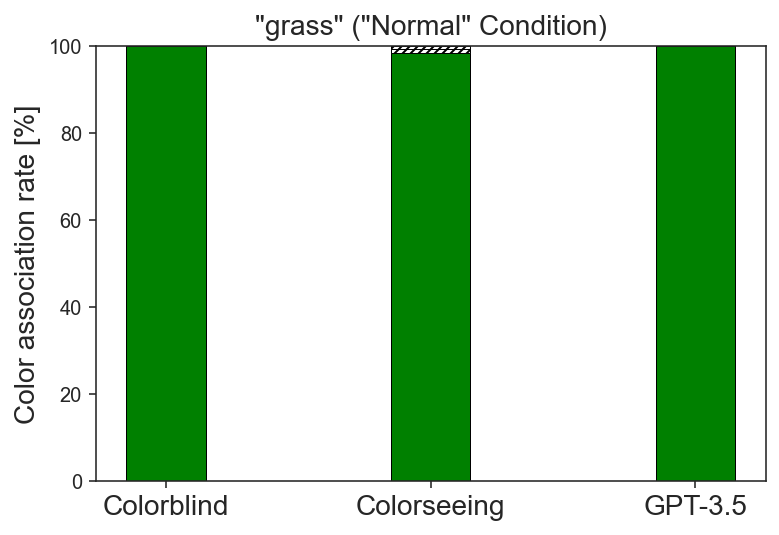

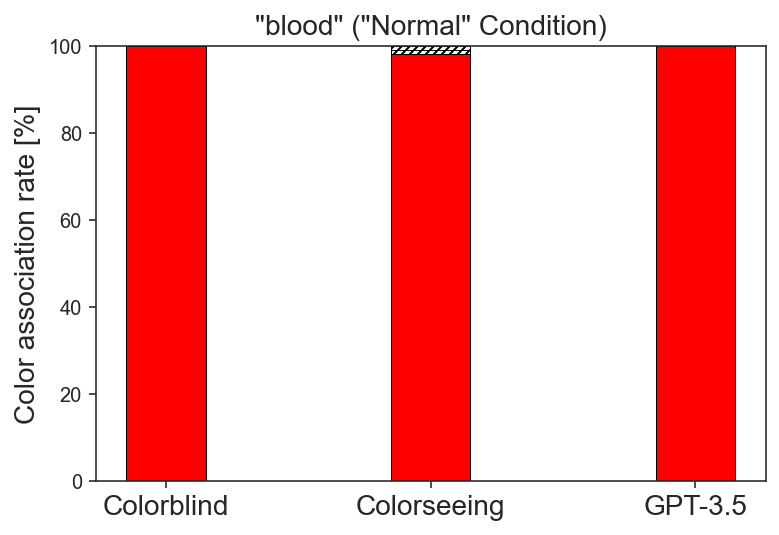

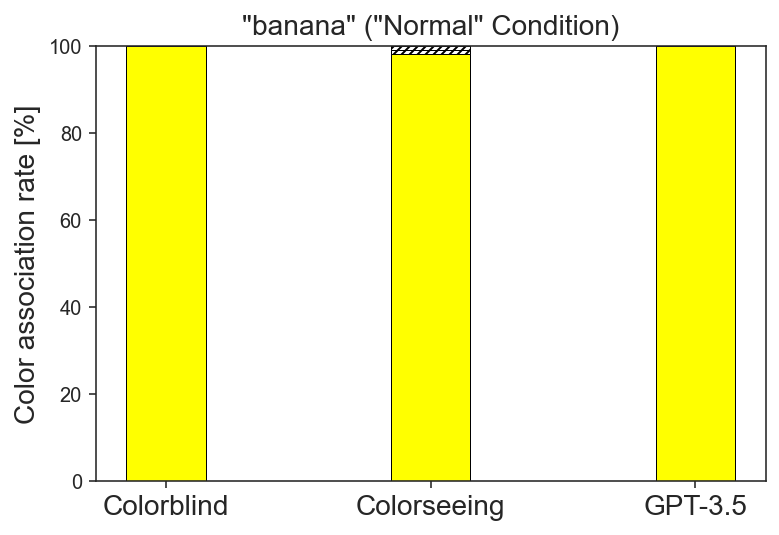

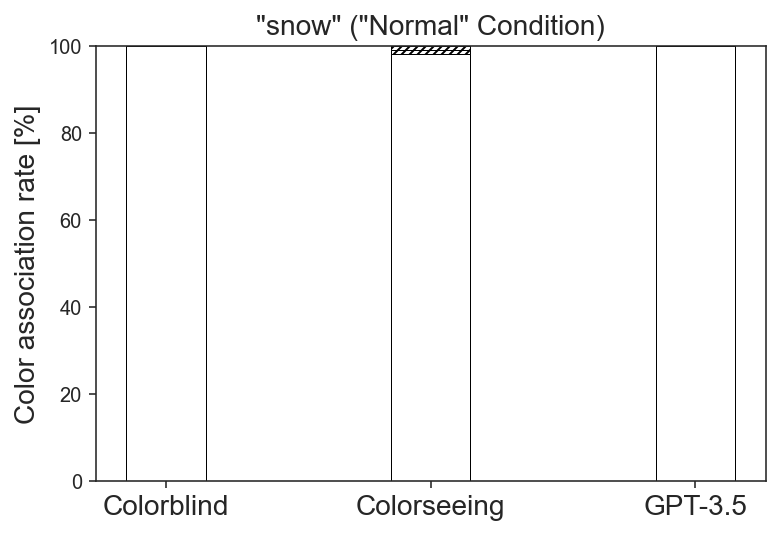

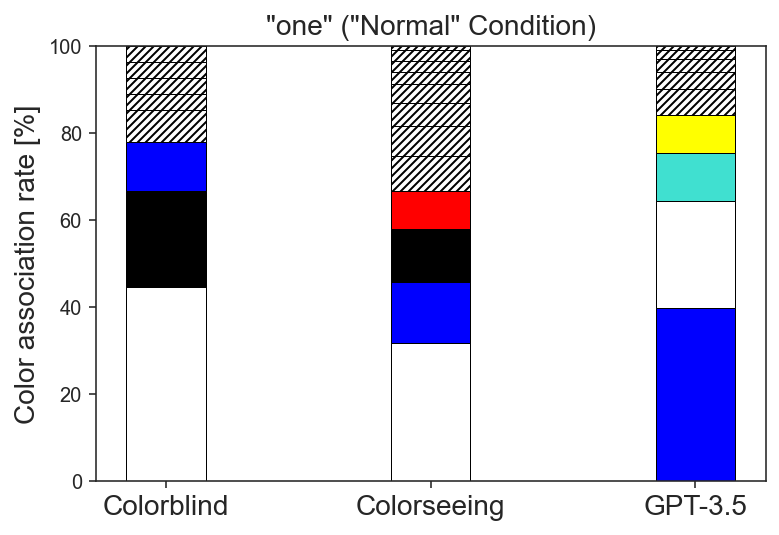

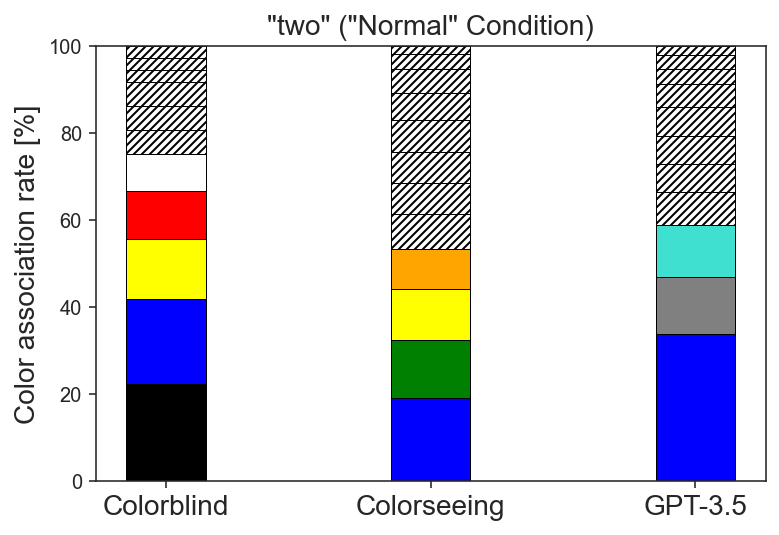

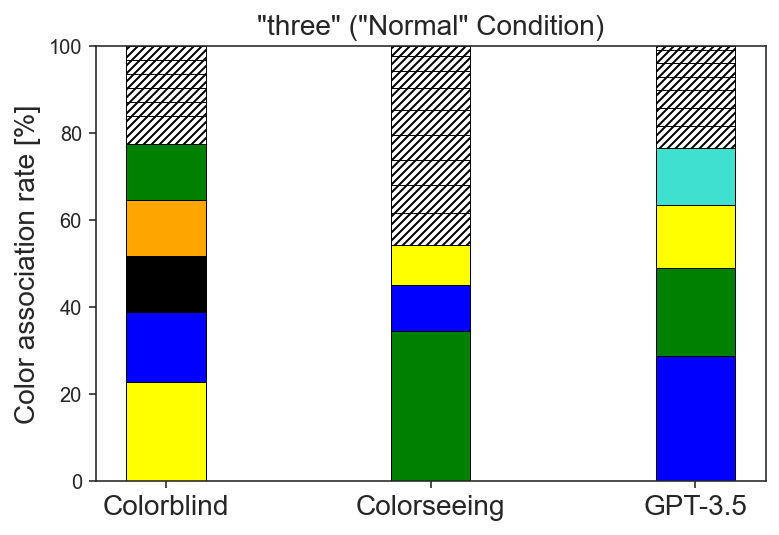

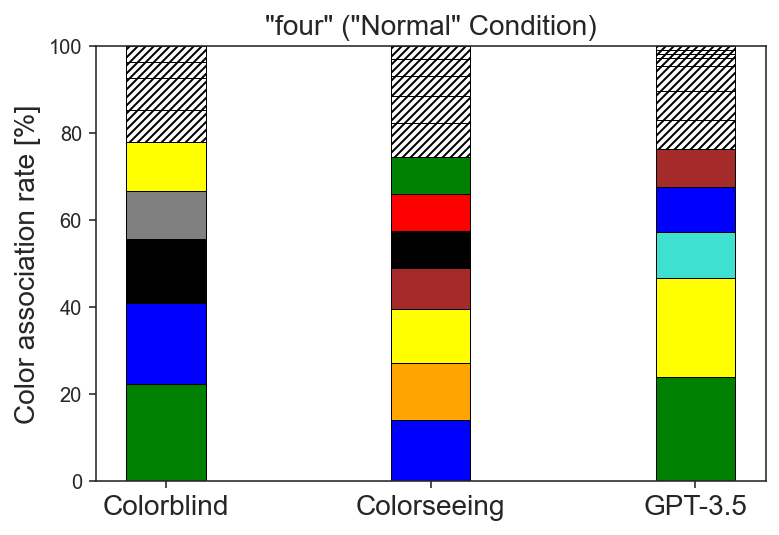

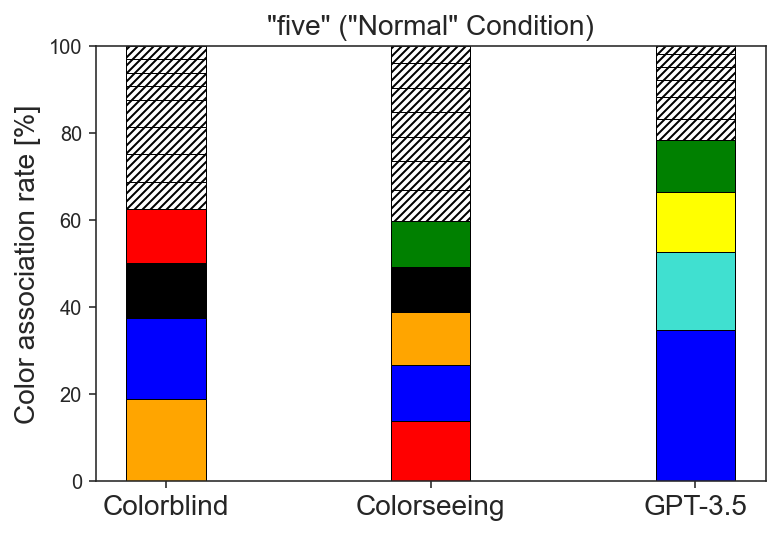

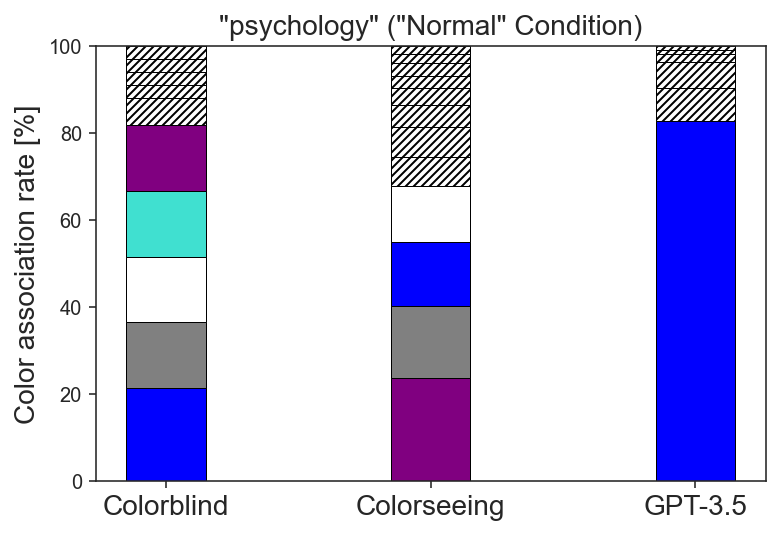

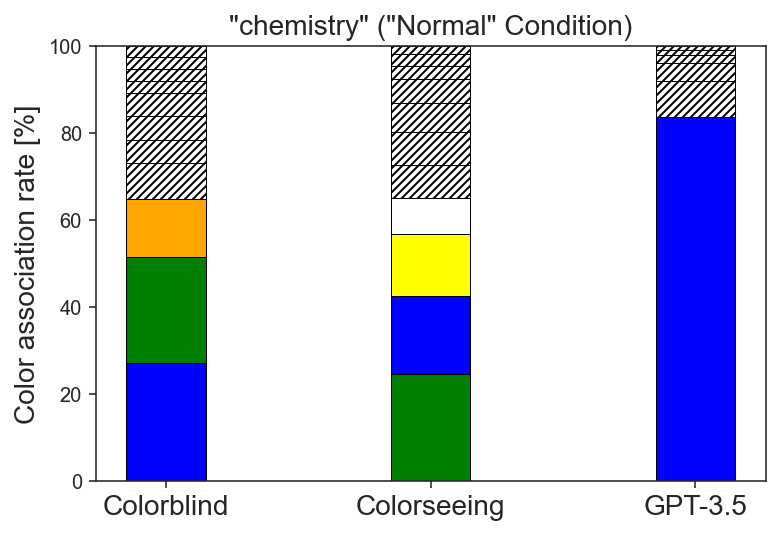

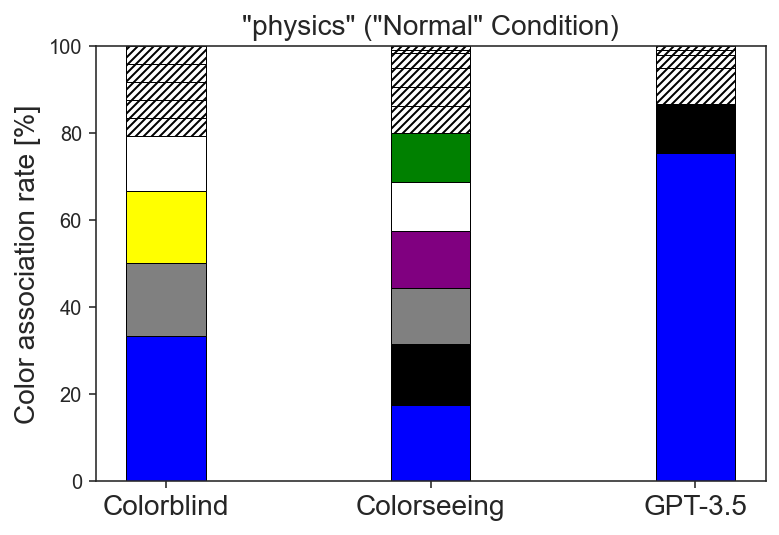

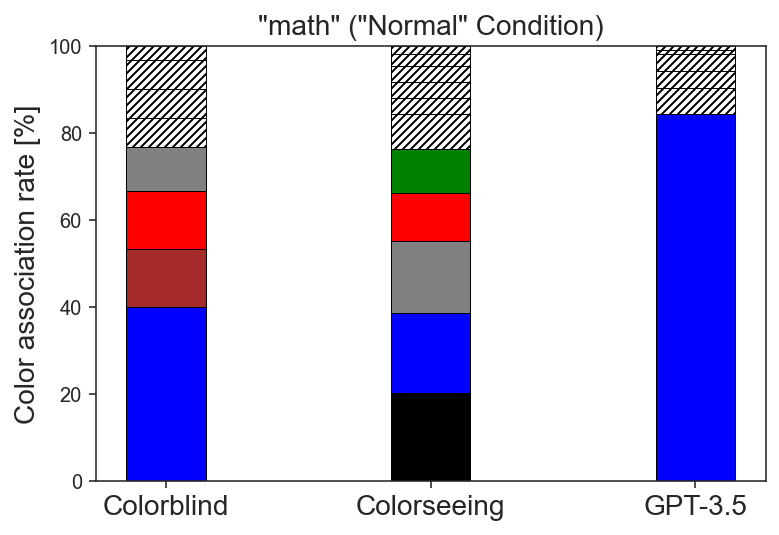

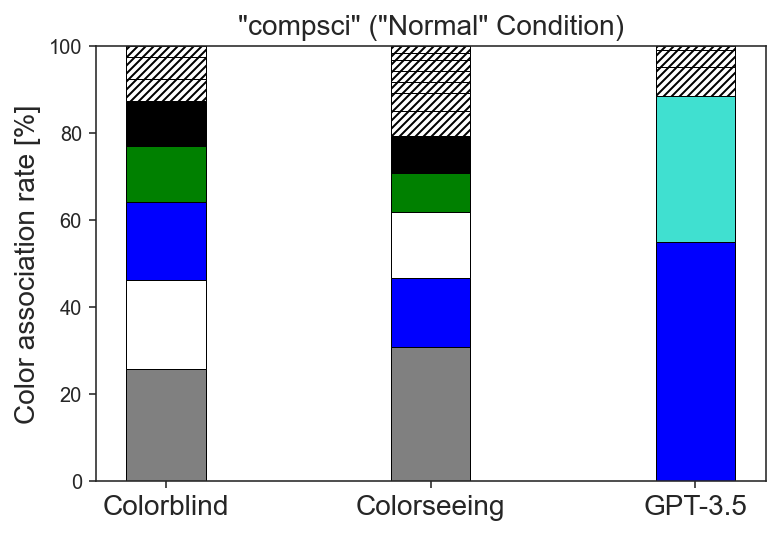

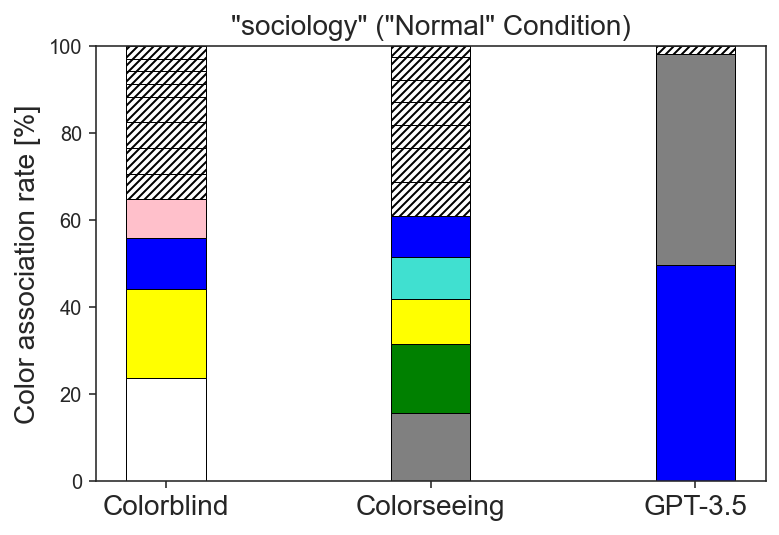

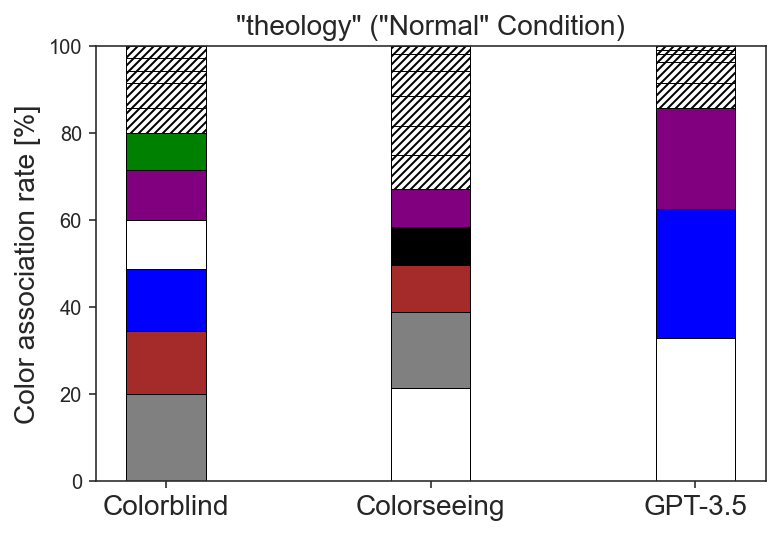

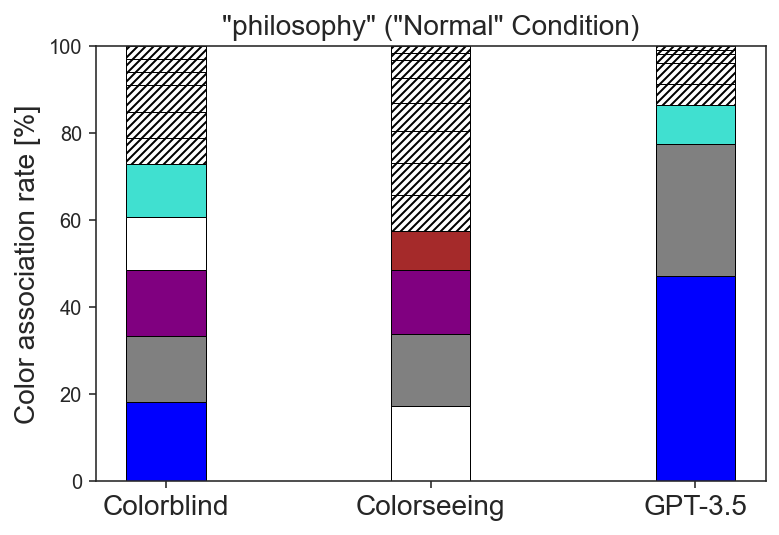

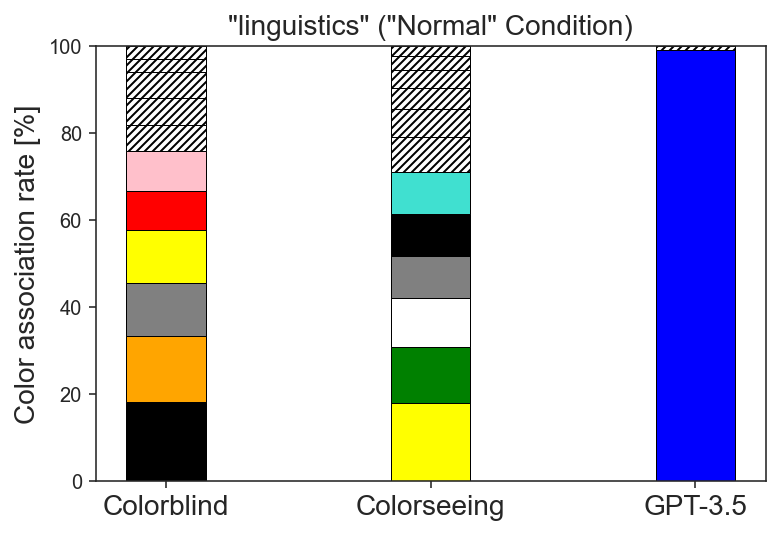

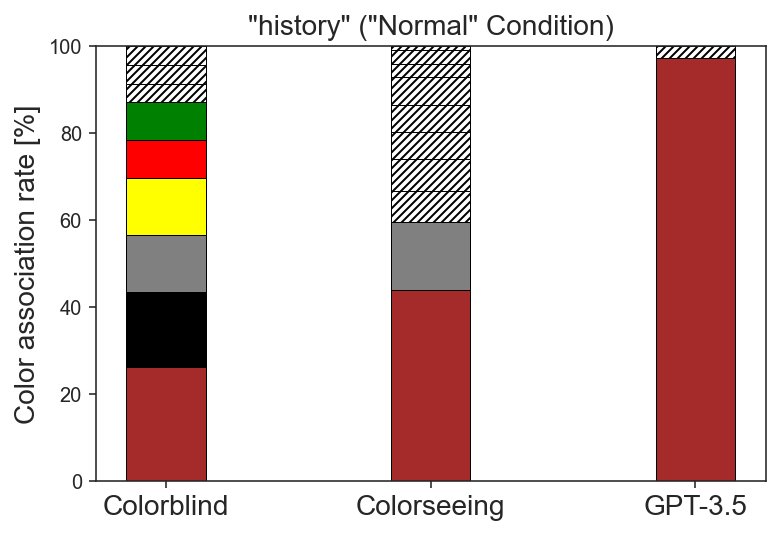

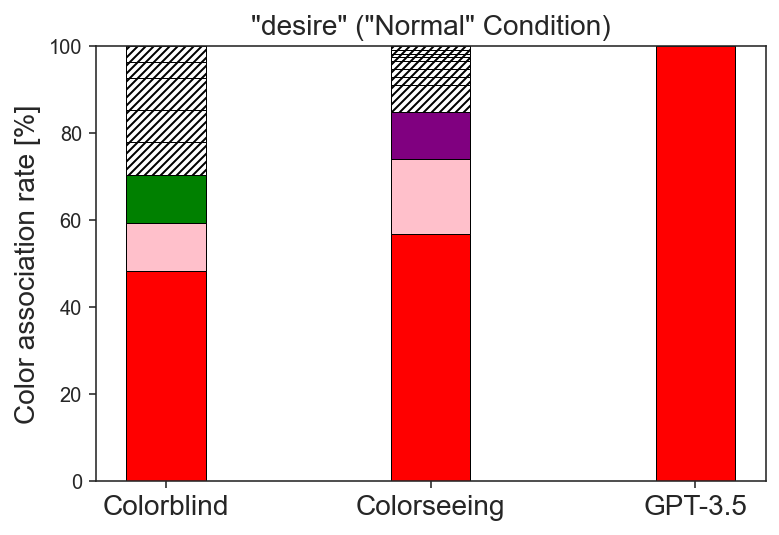

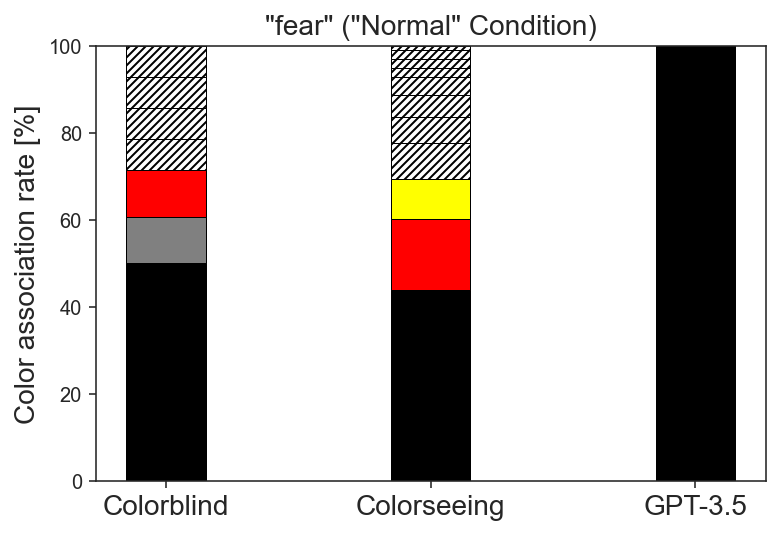

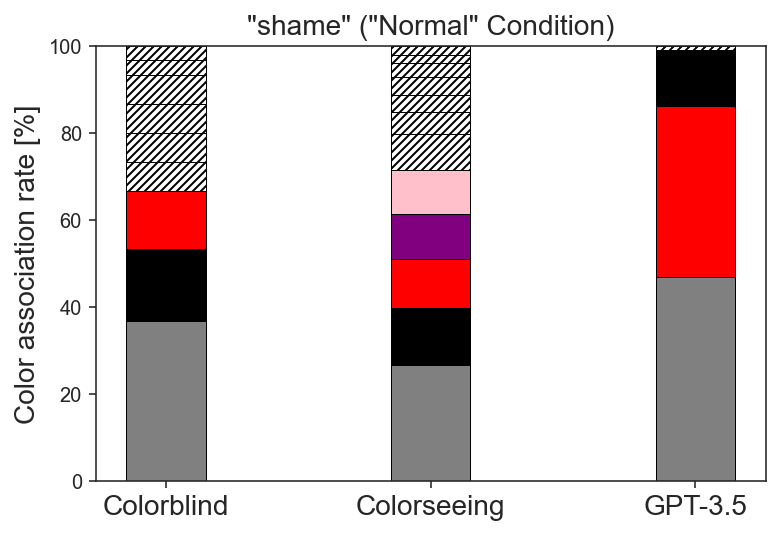

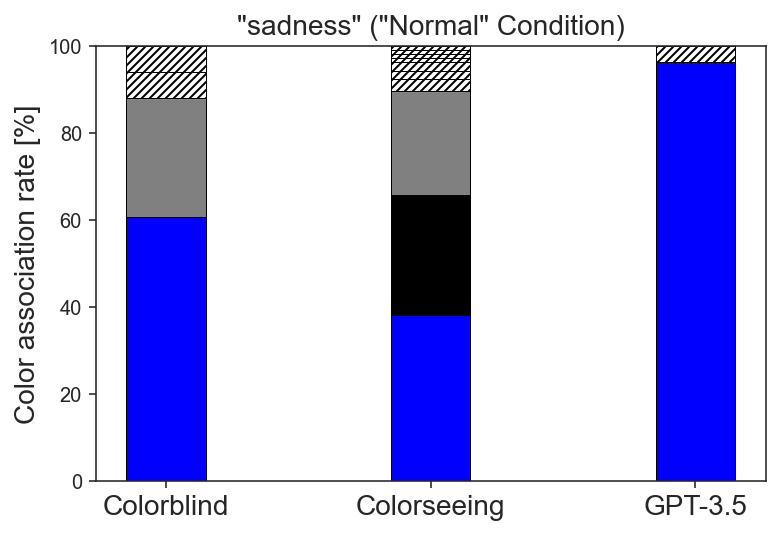

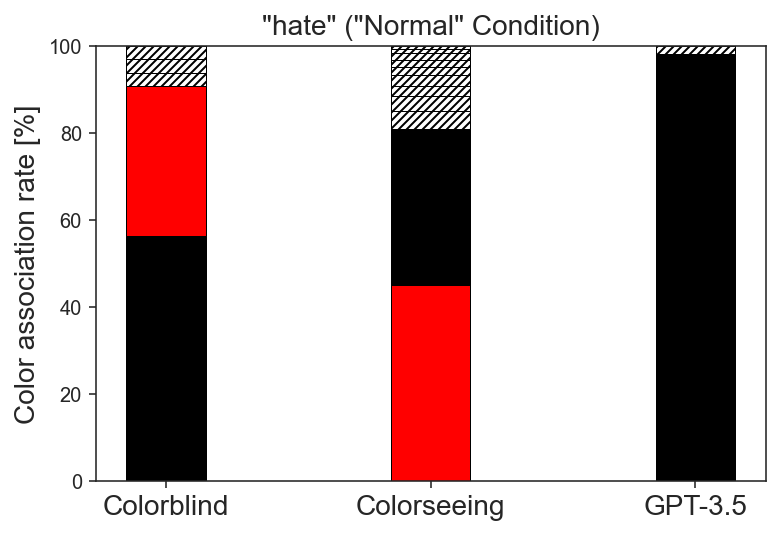

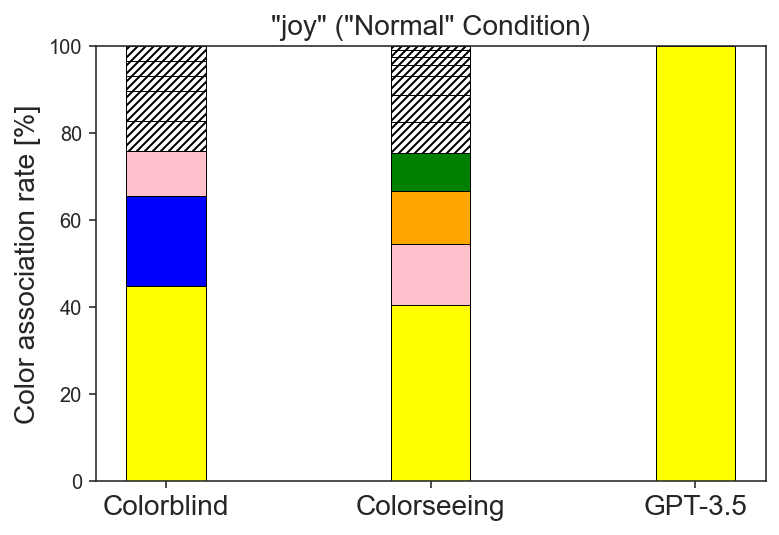

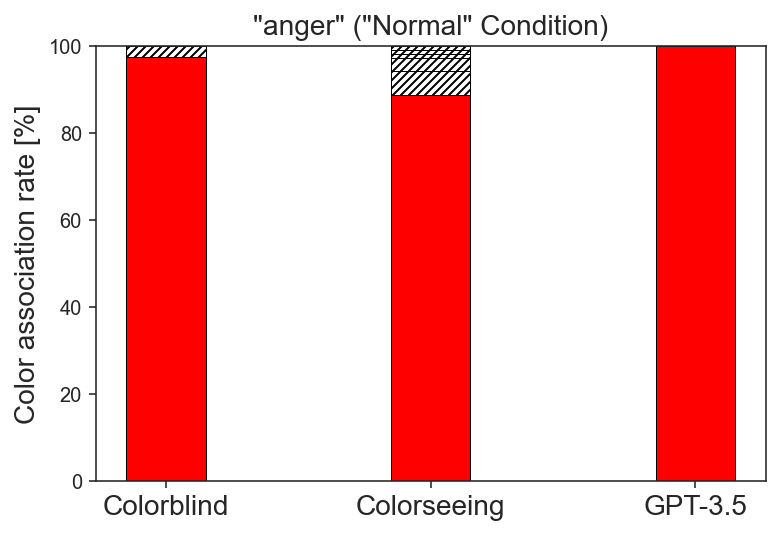

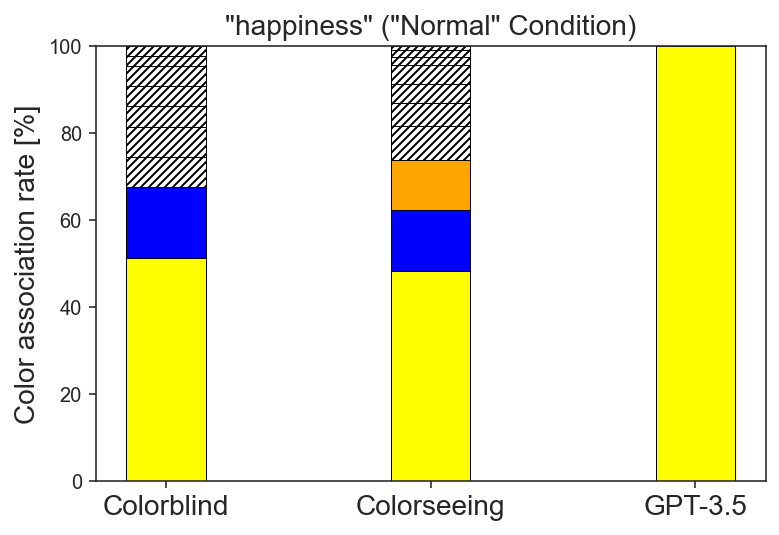

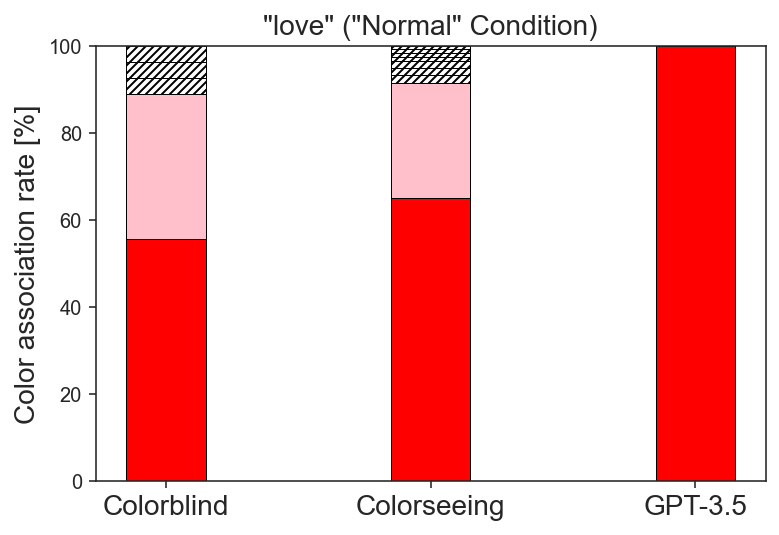

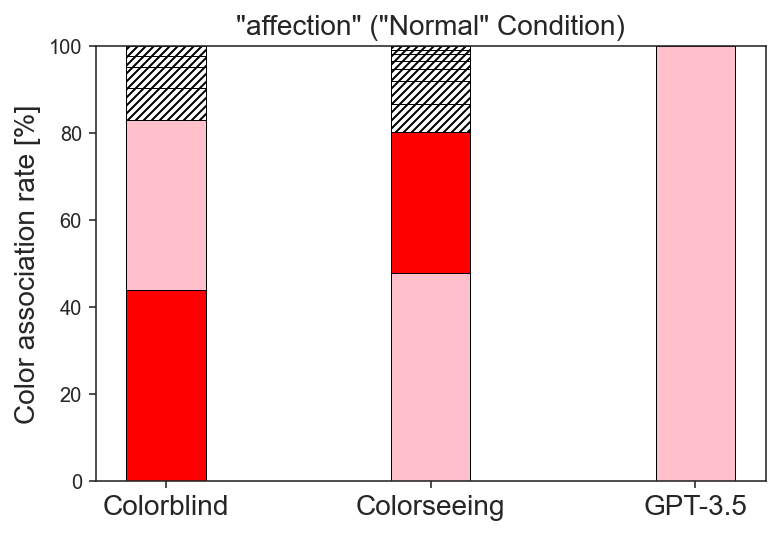

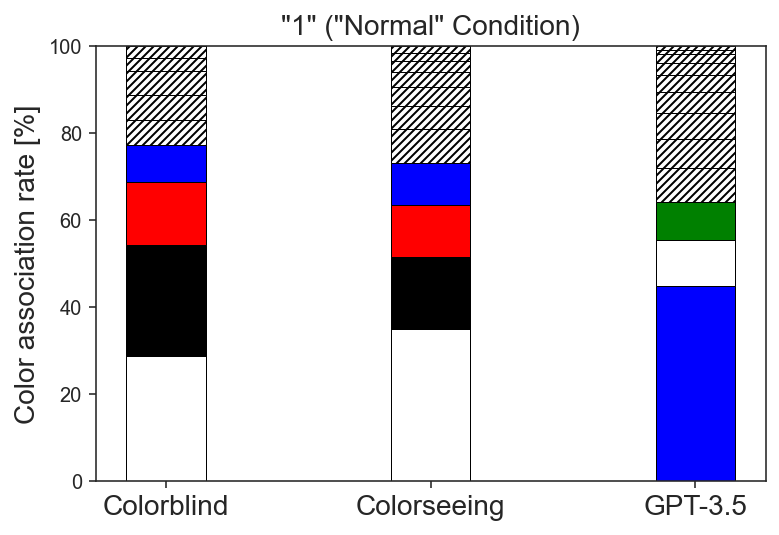

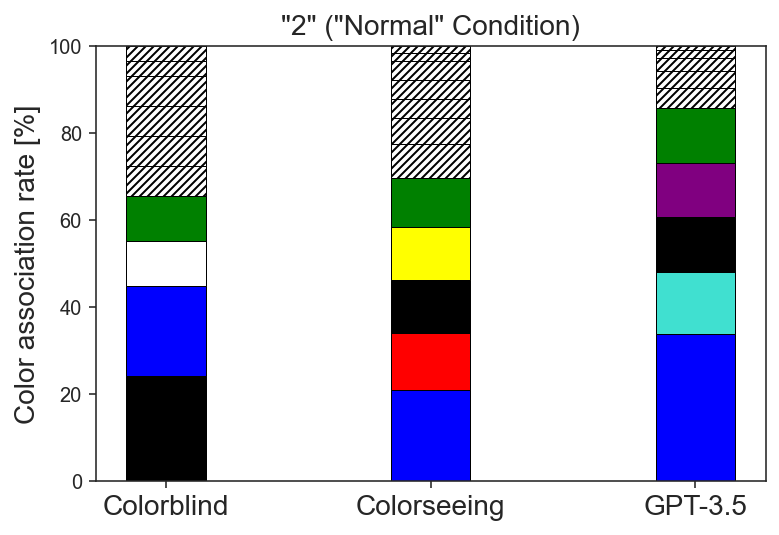

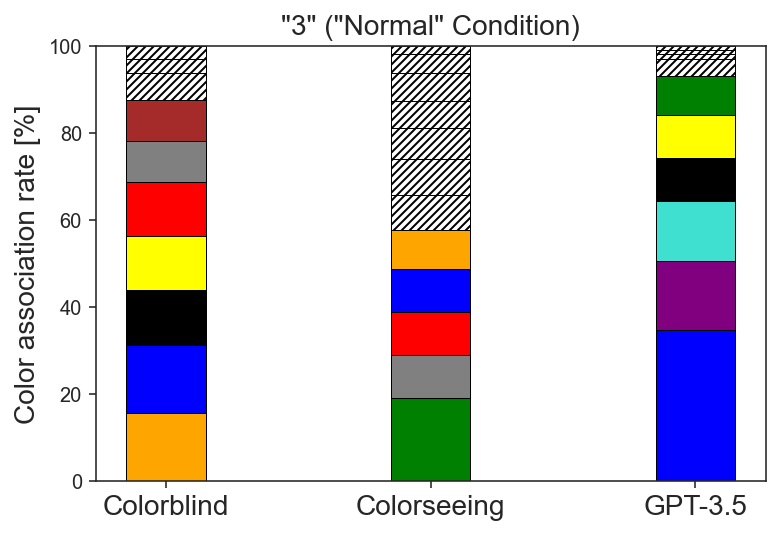

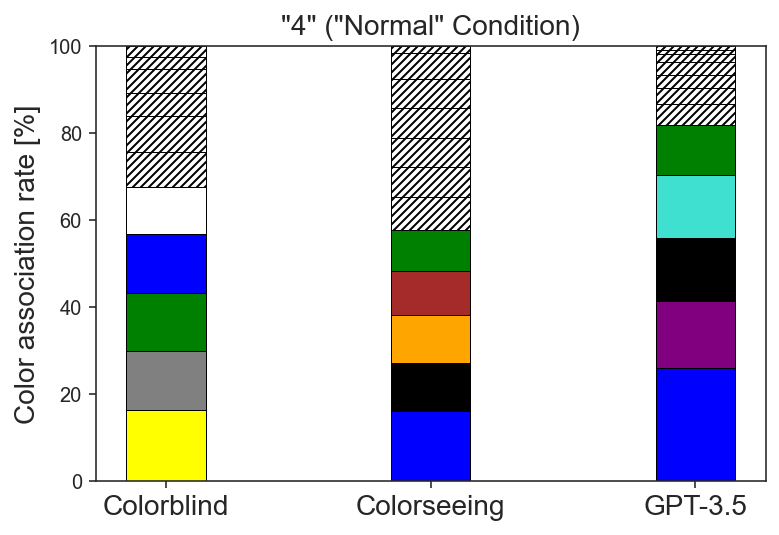

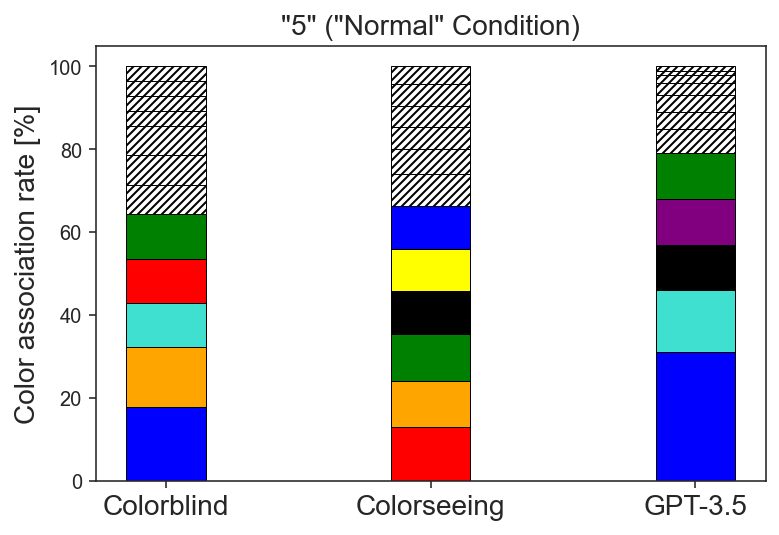

In [11]:
create_grouped_bar_plots(modal_colors, terms, all_colors,'_norm')

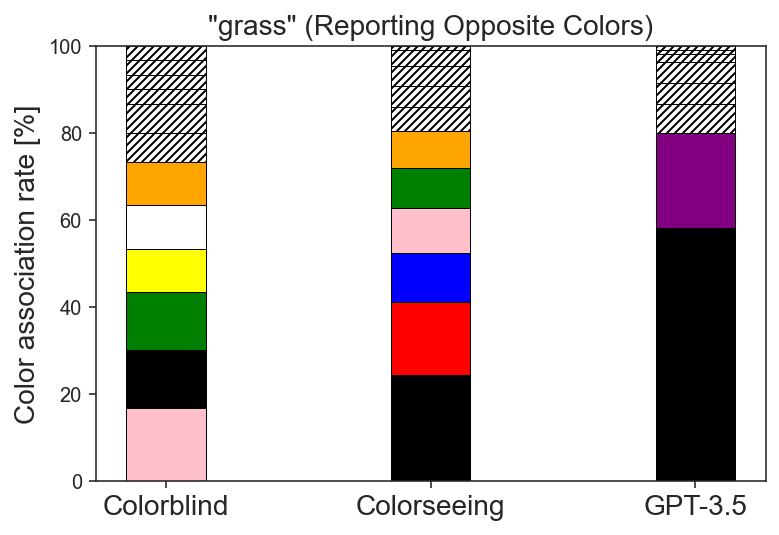

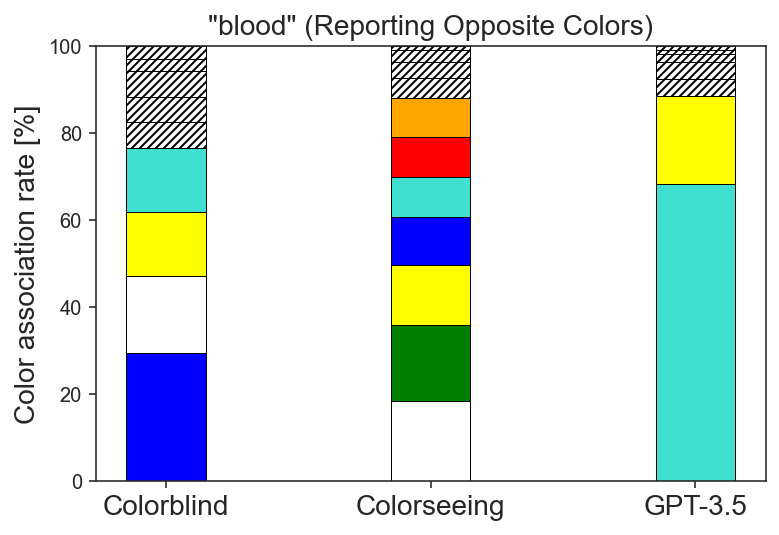

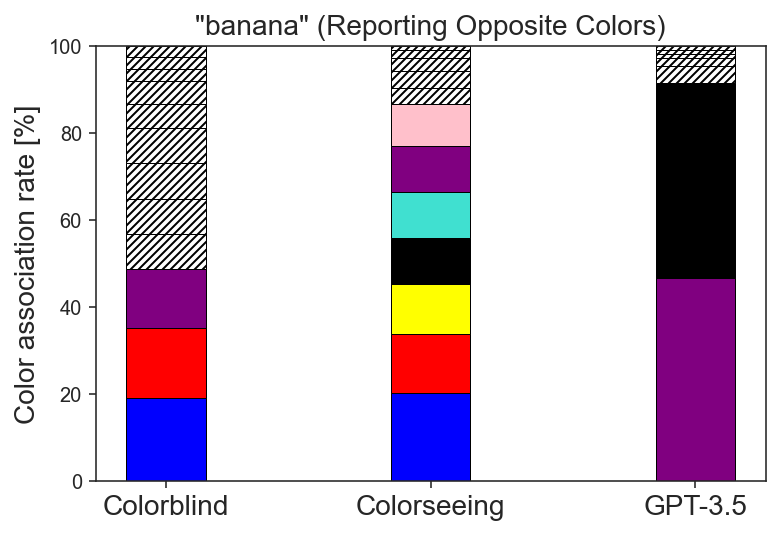

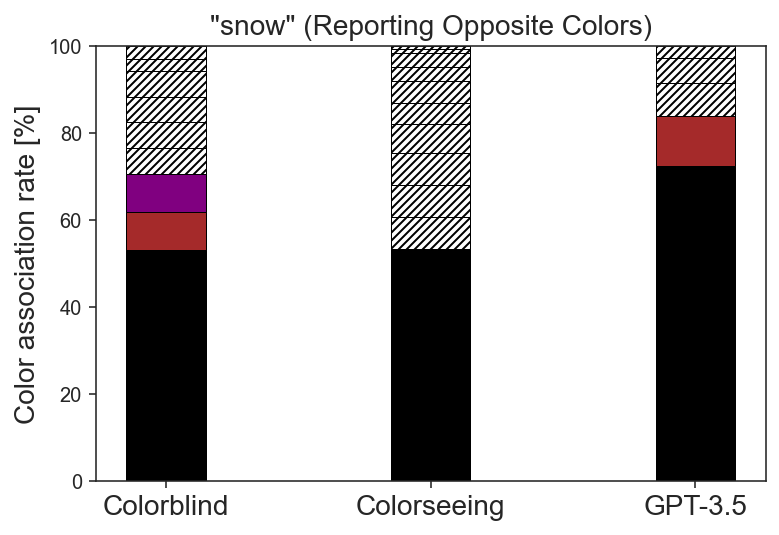

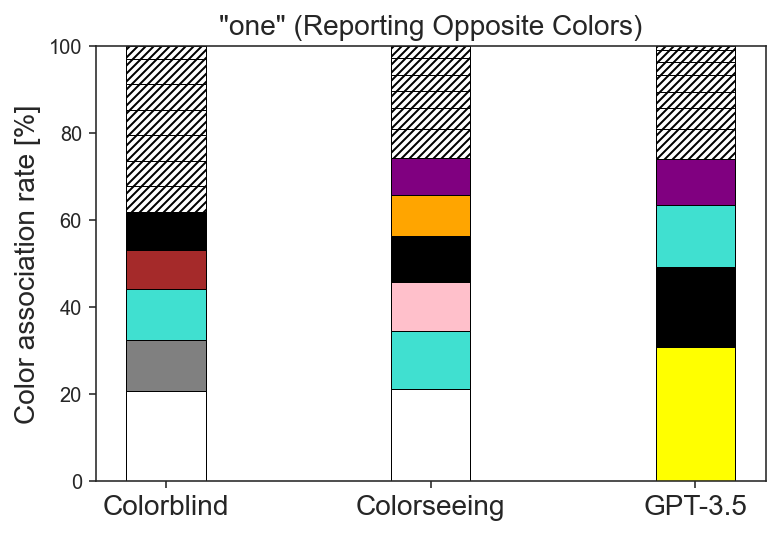

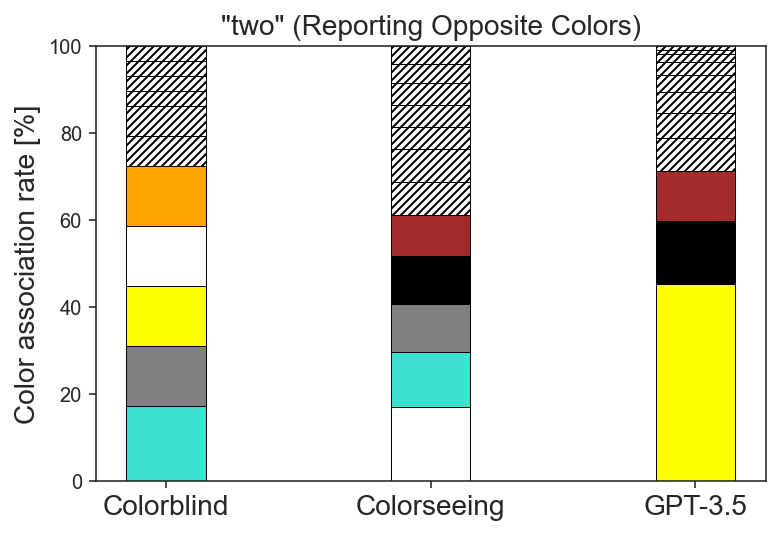

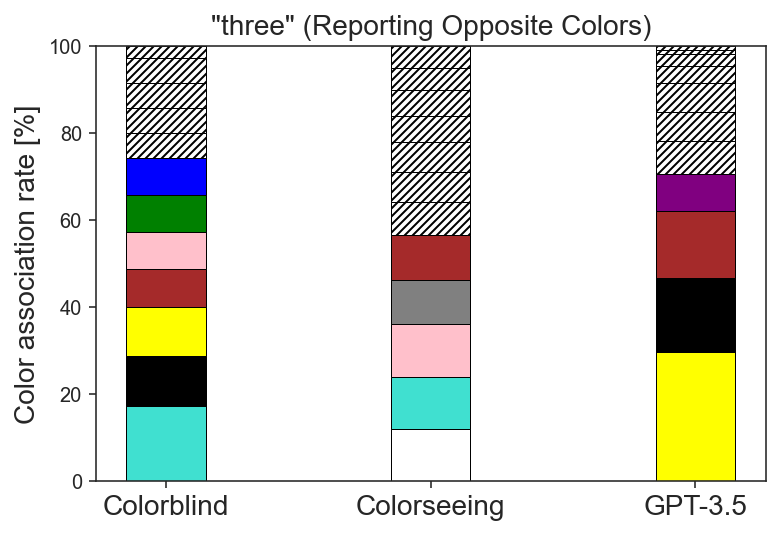

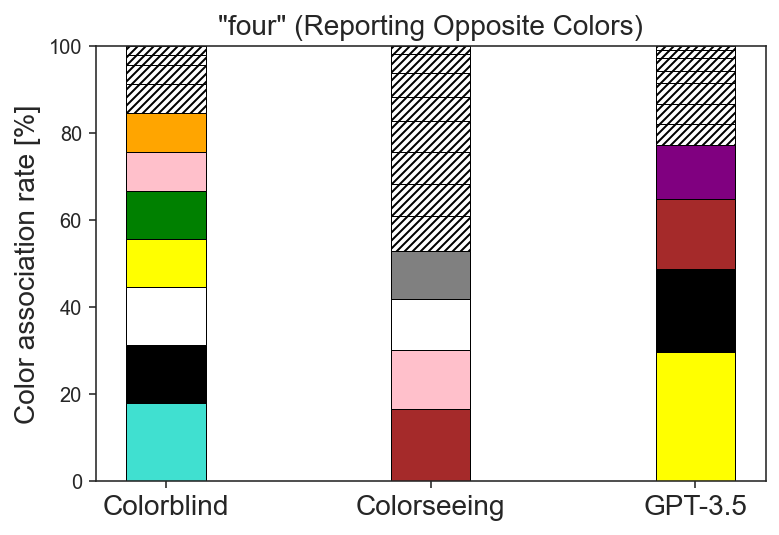

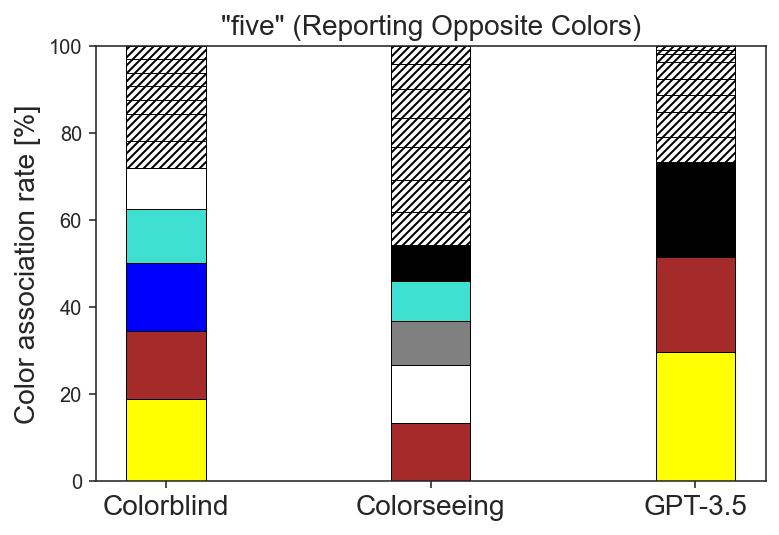

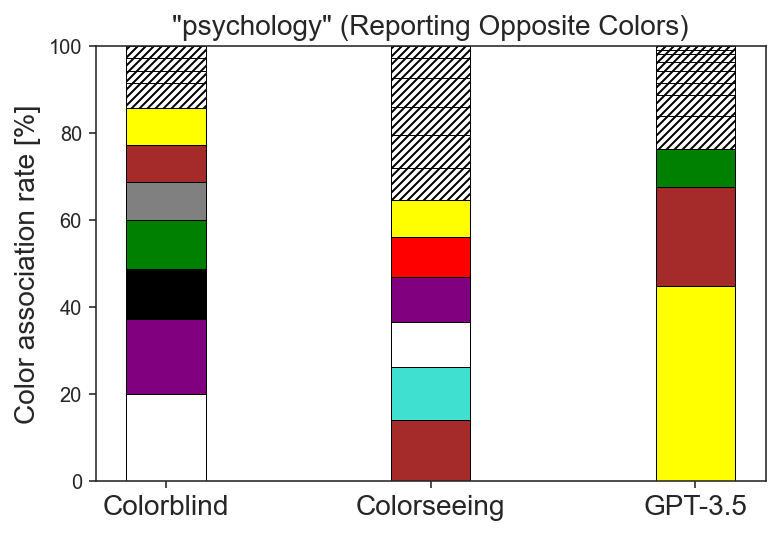

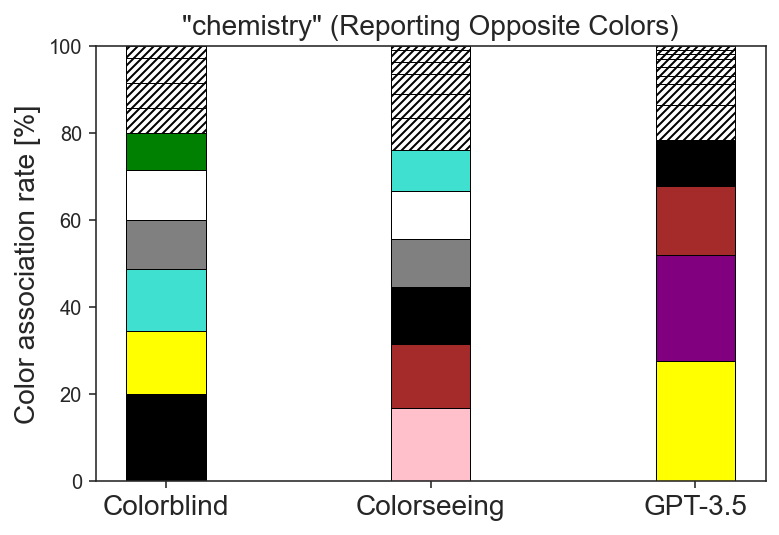

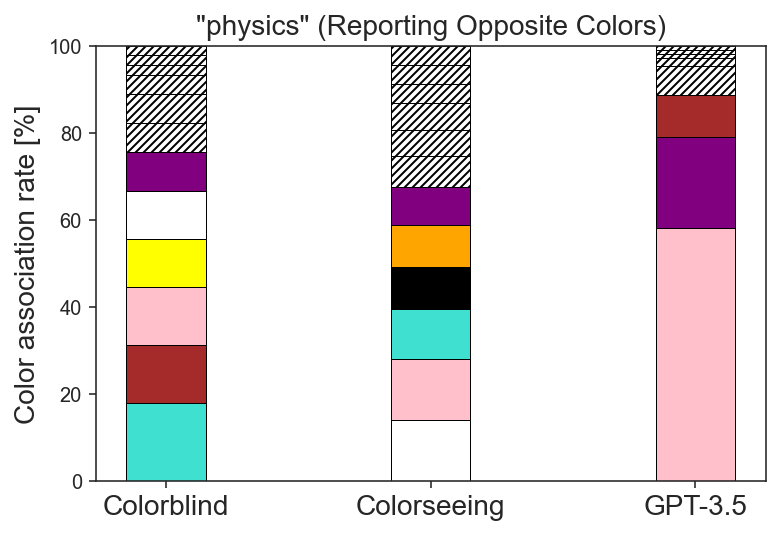

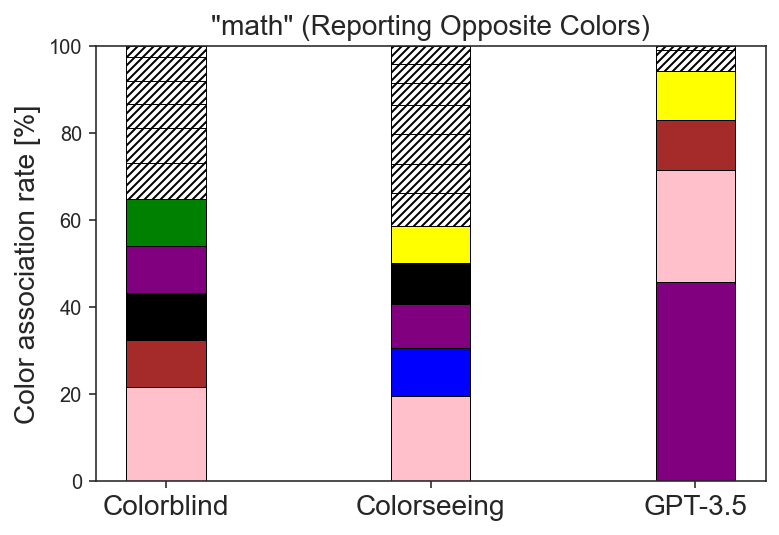

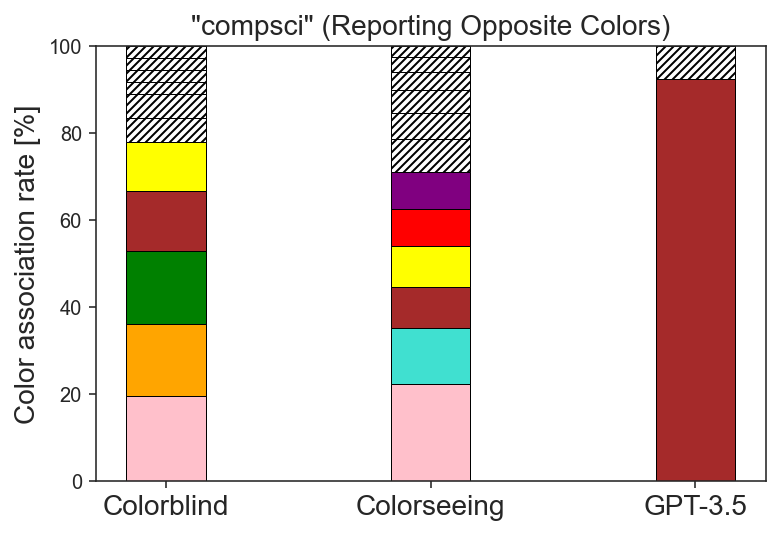

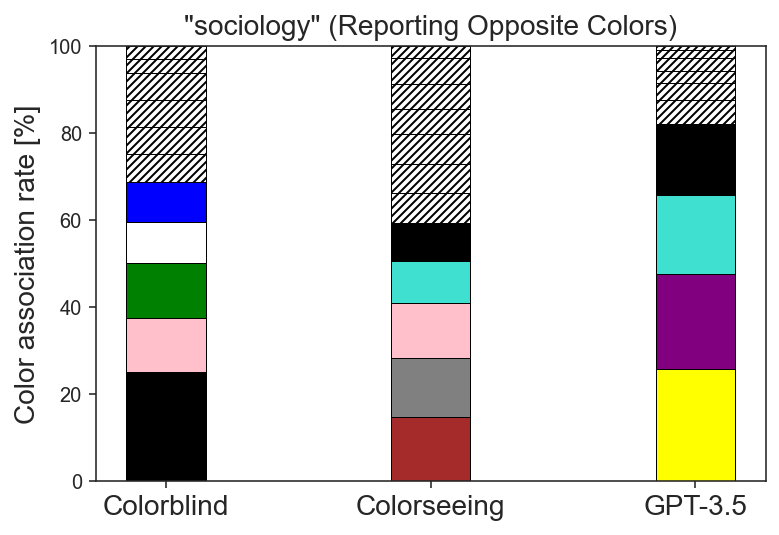

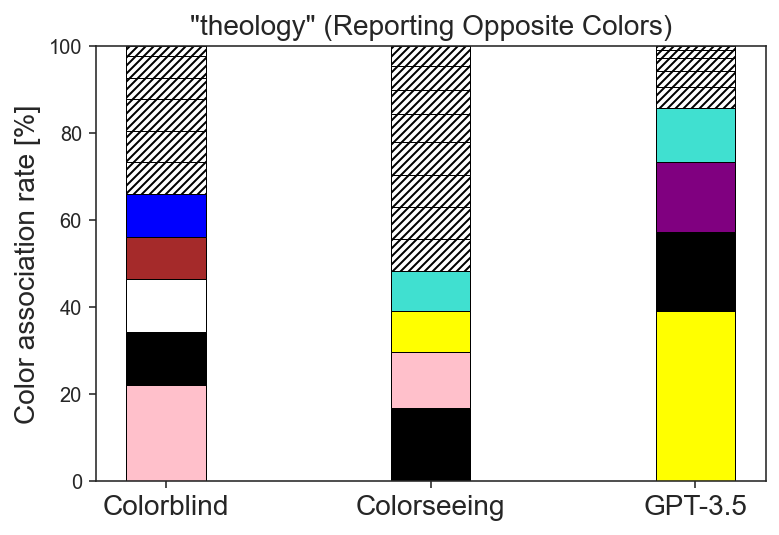

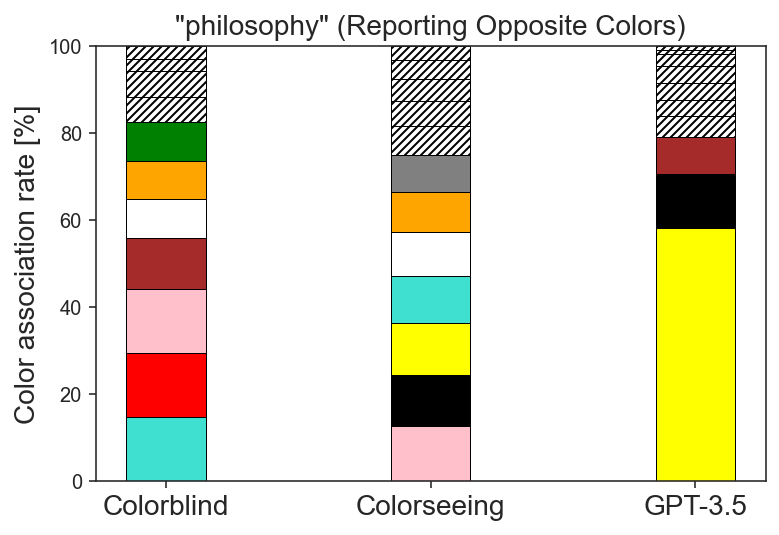

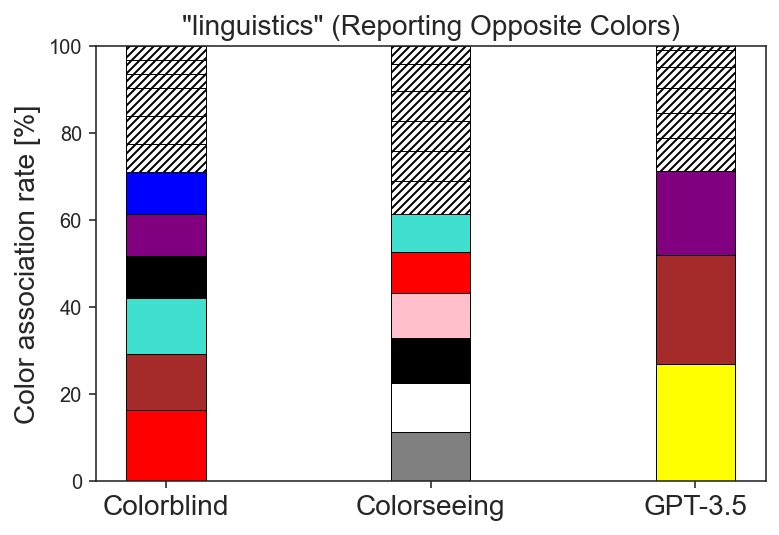

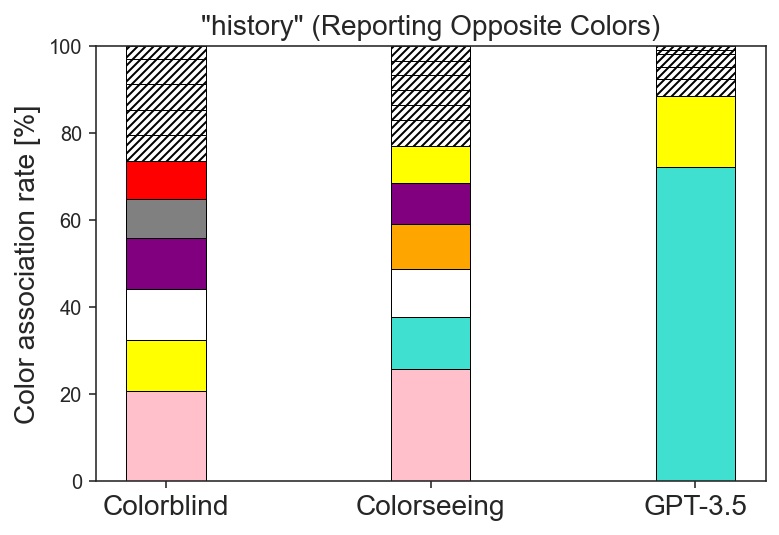

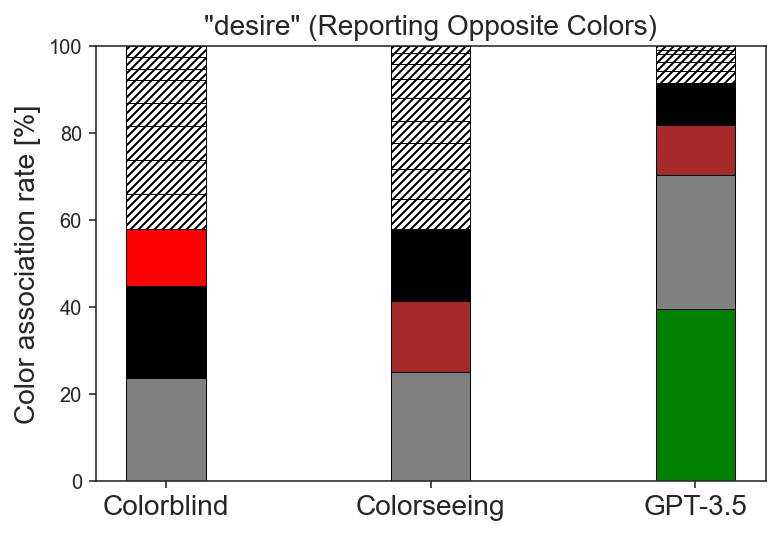

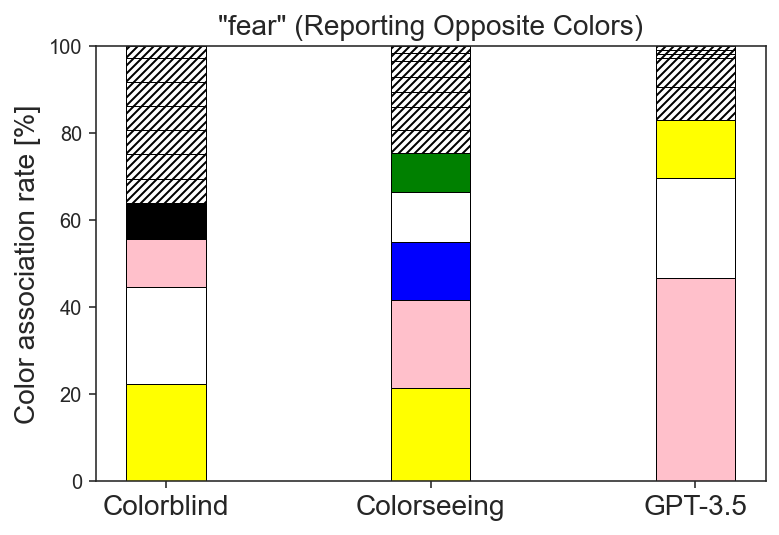

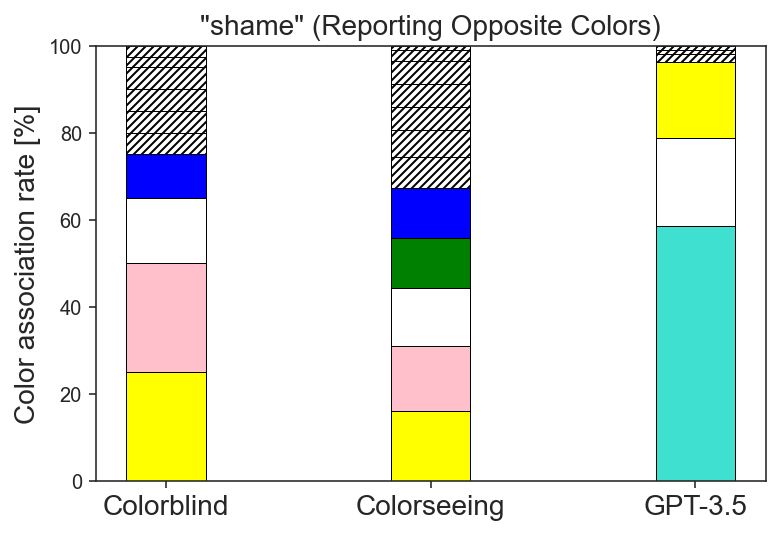

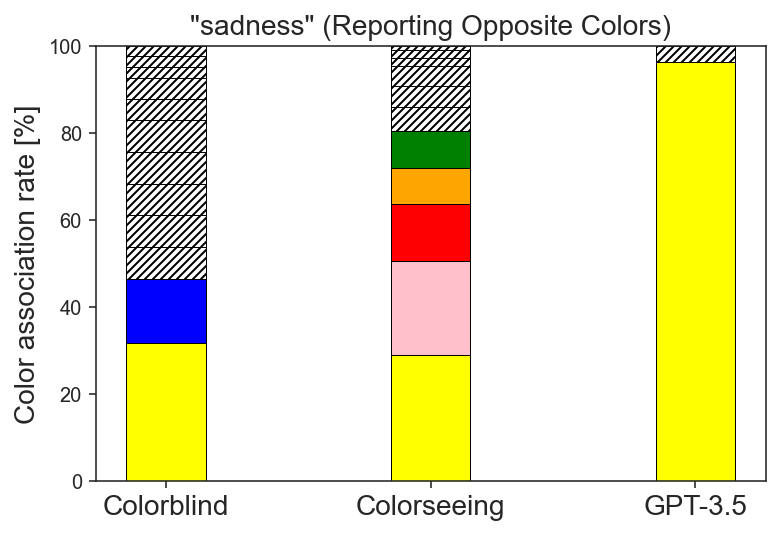

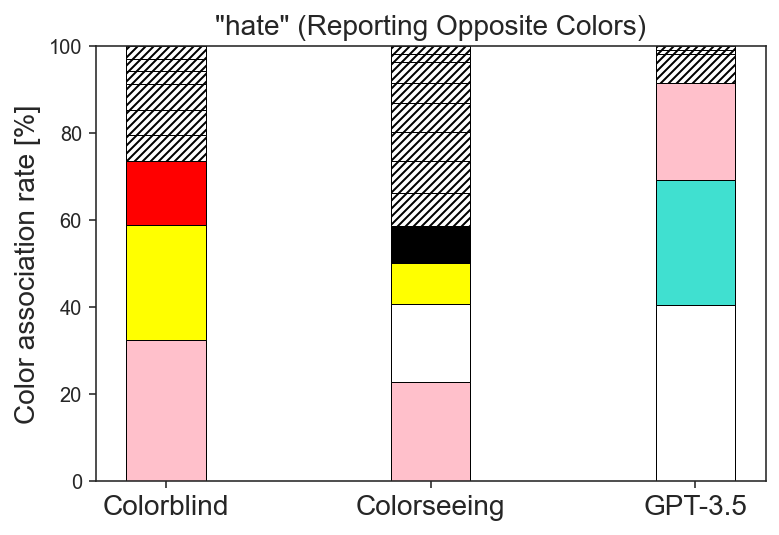

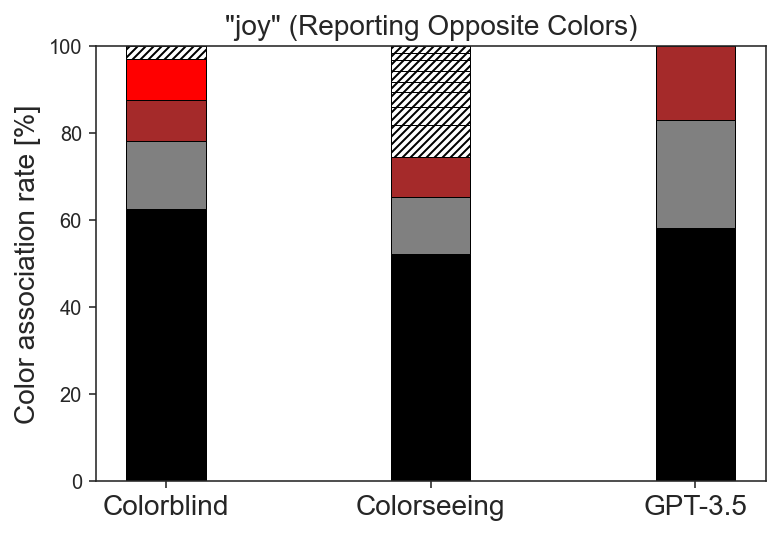

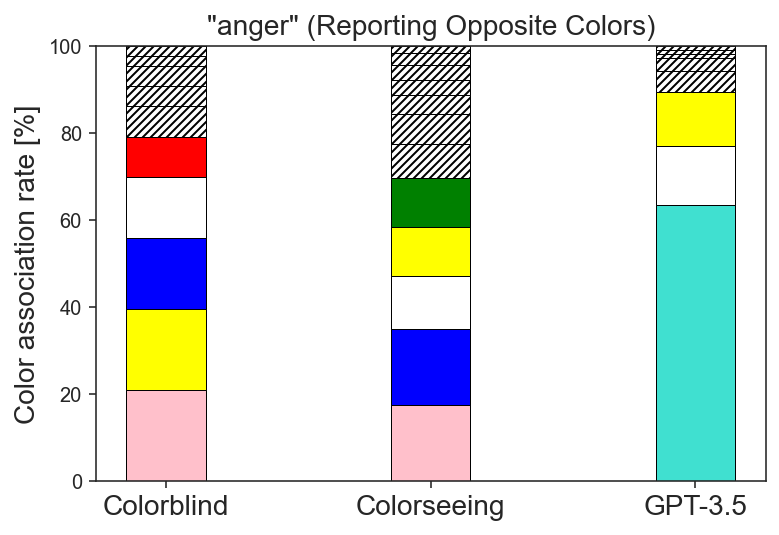

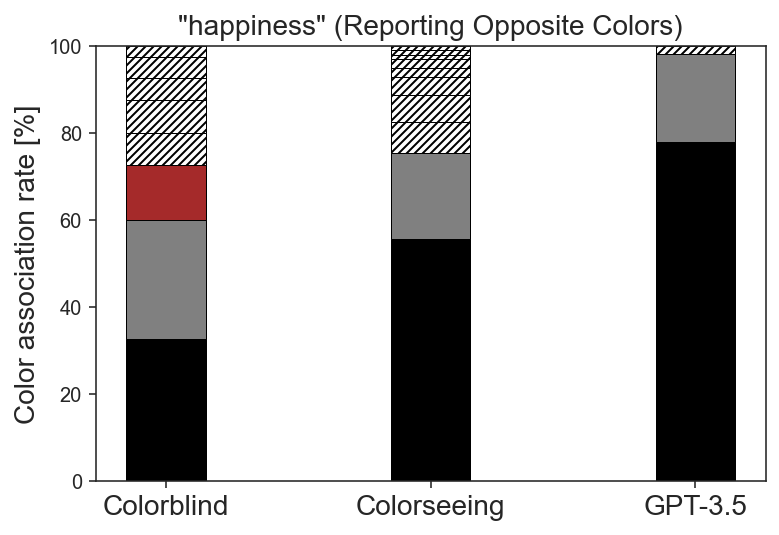

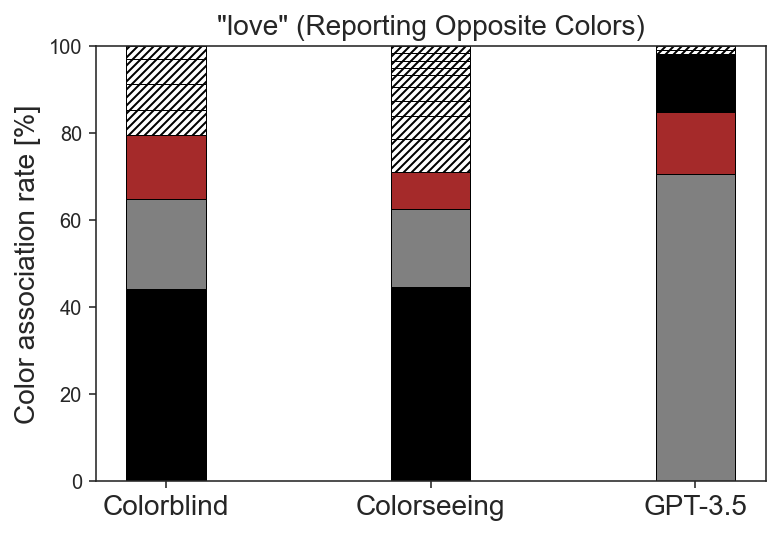

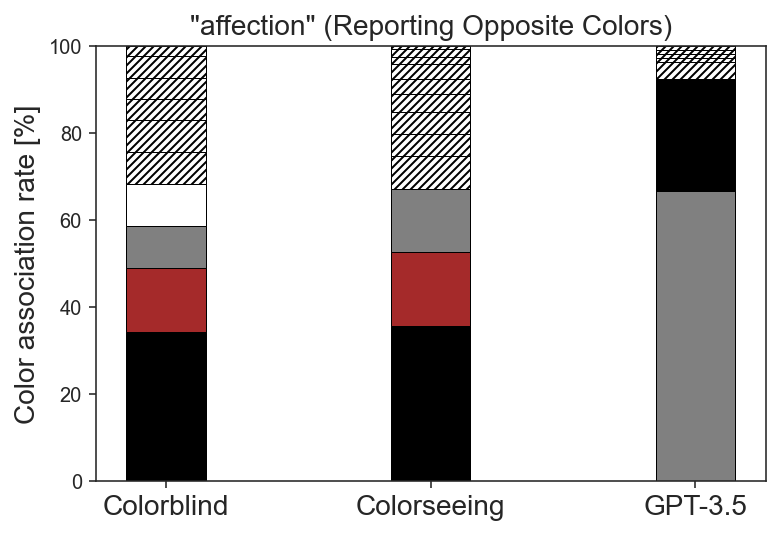

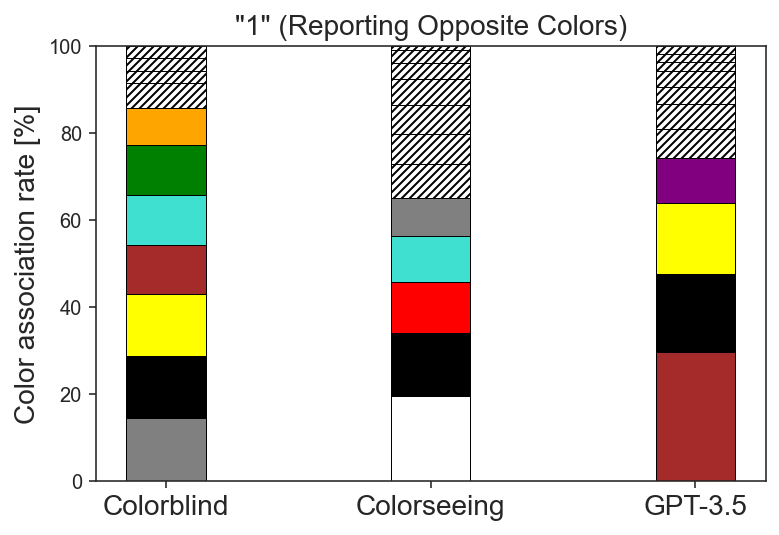

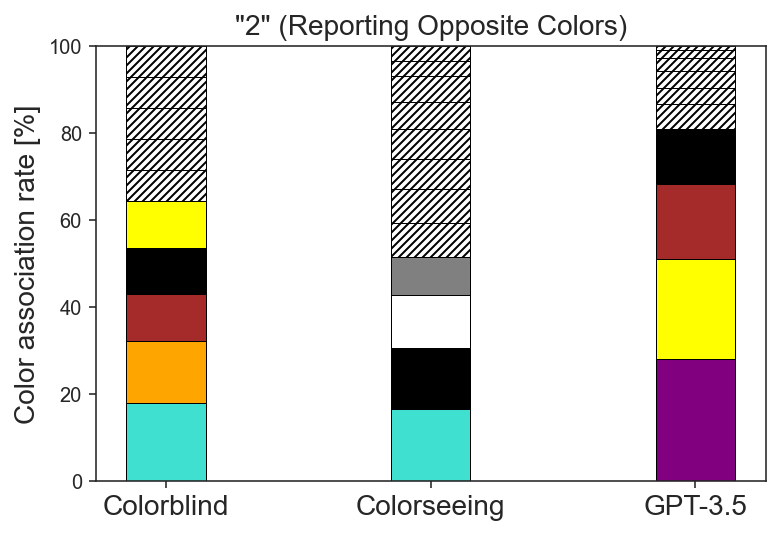

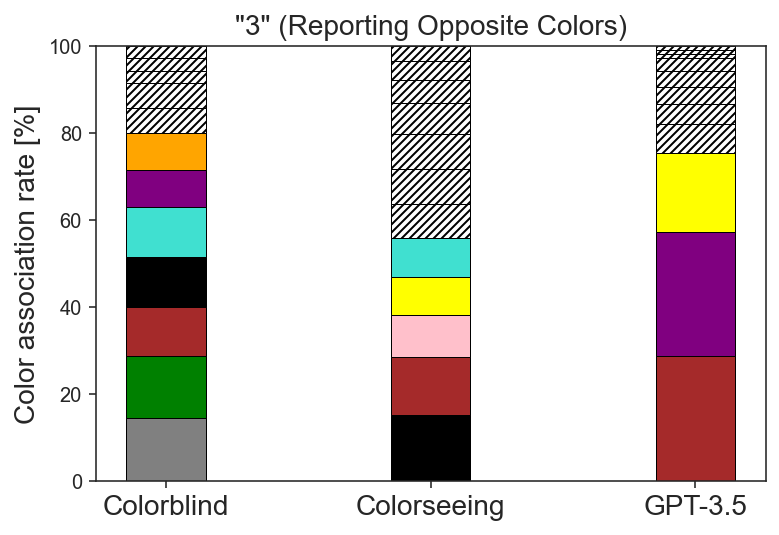

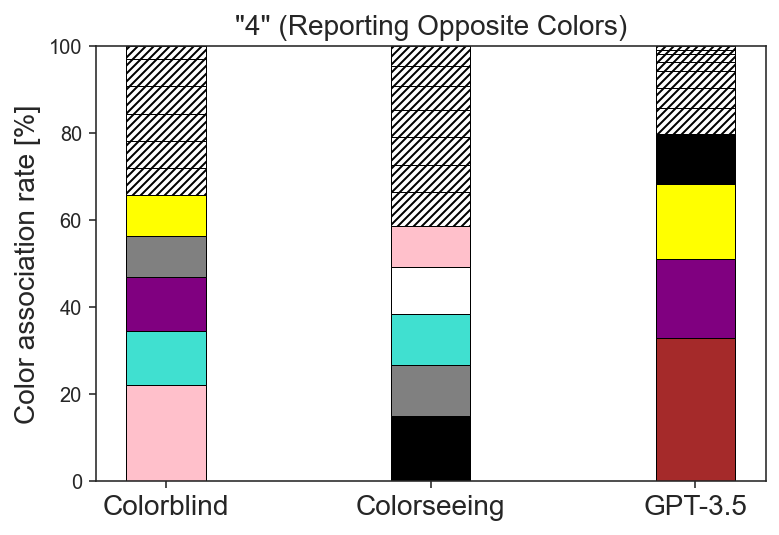

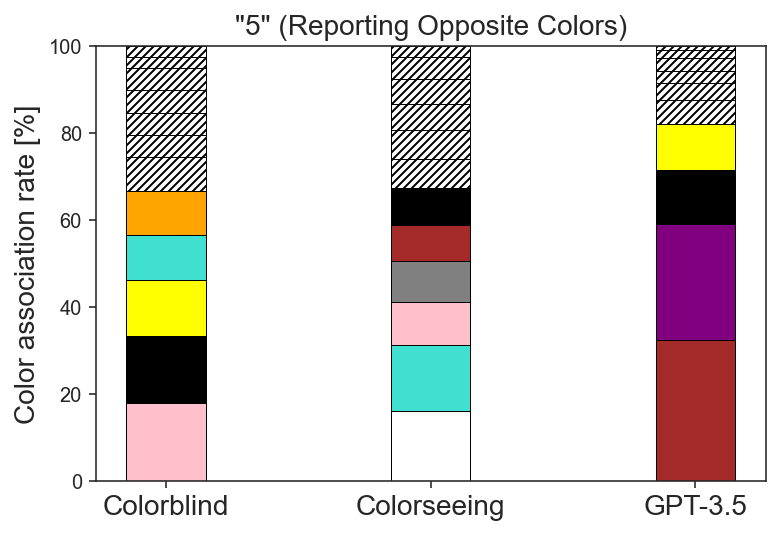

In [12]:
create_grouped_bar_plots(modal_colors, terms, all_colors,'_opp')

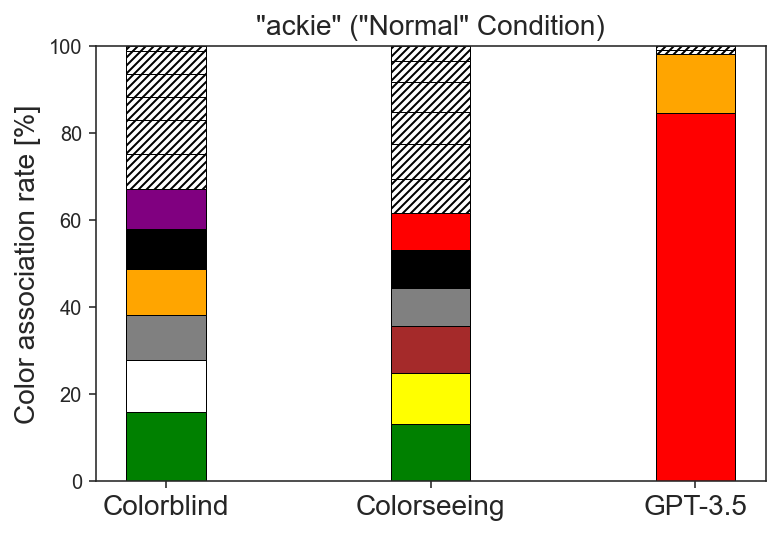

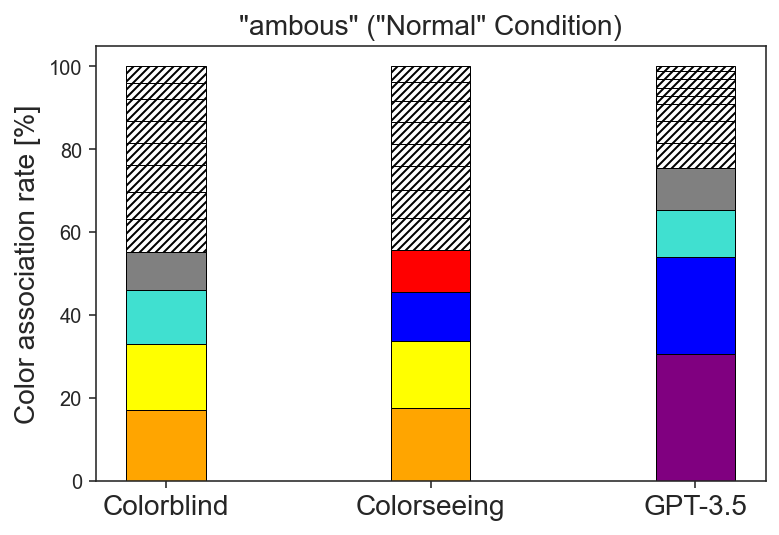

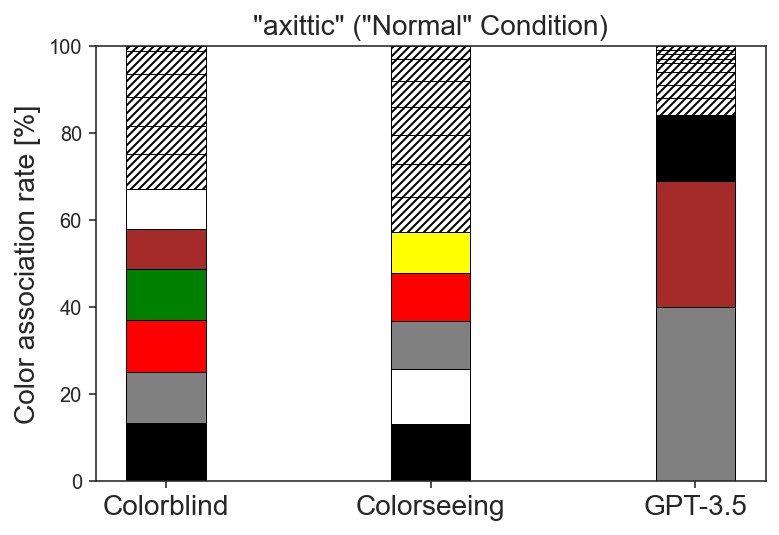

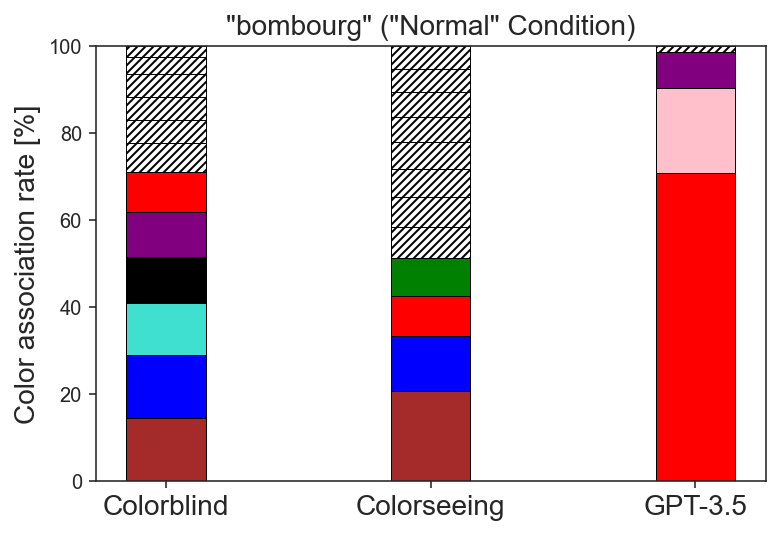

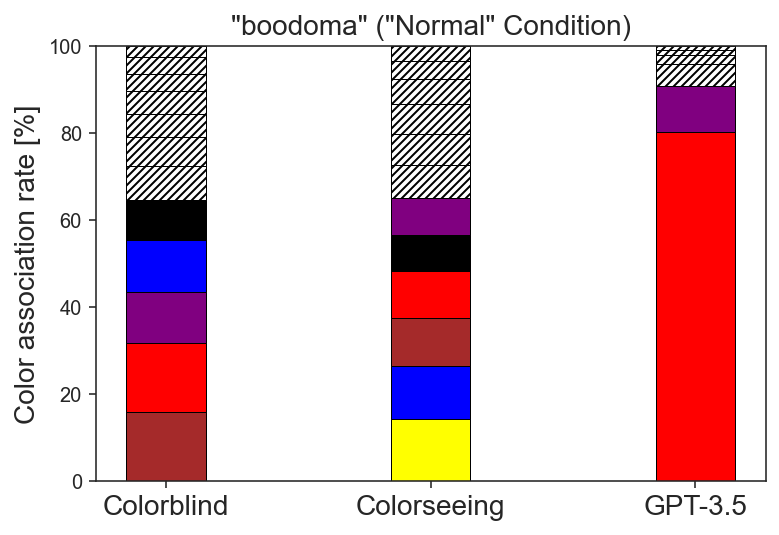

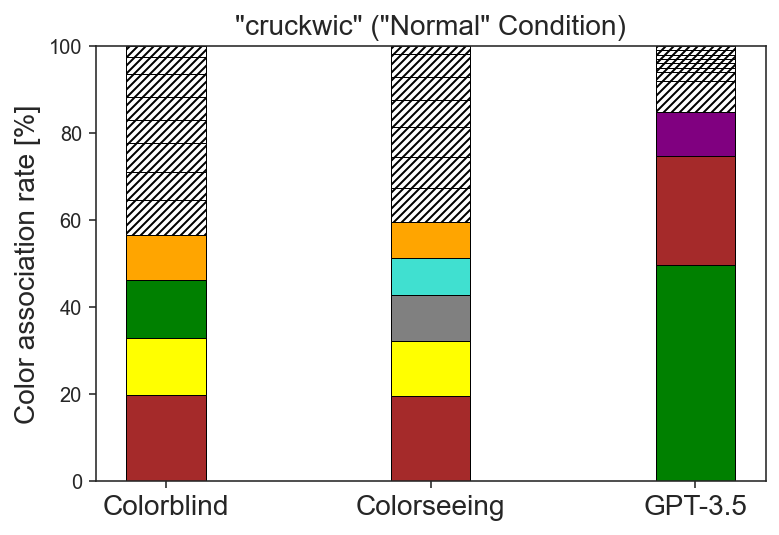

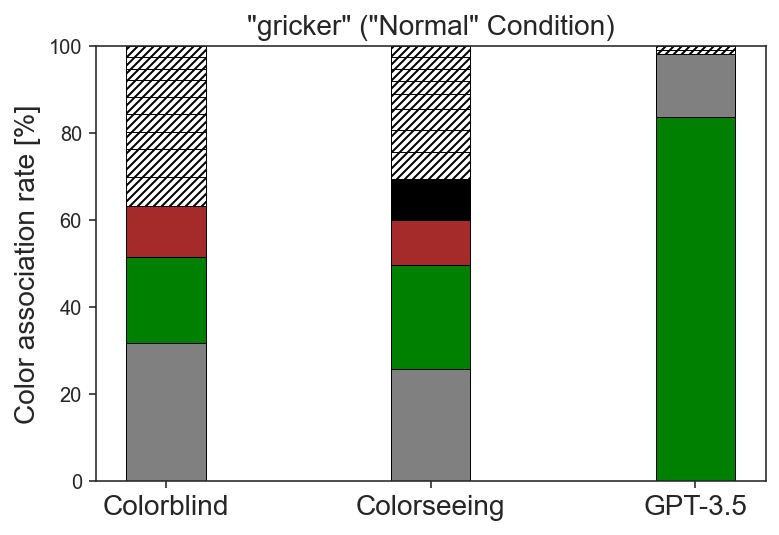

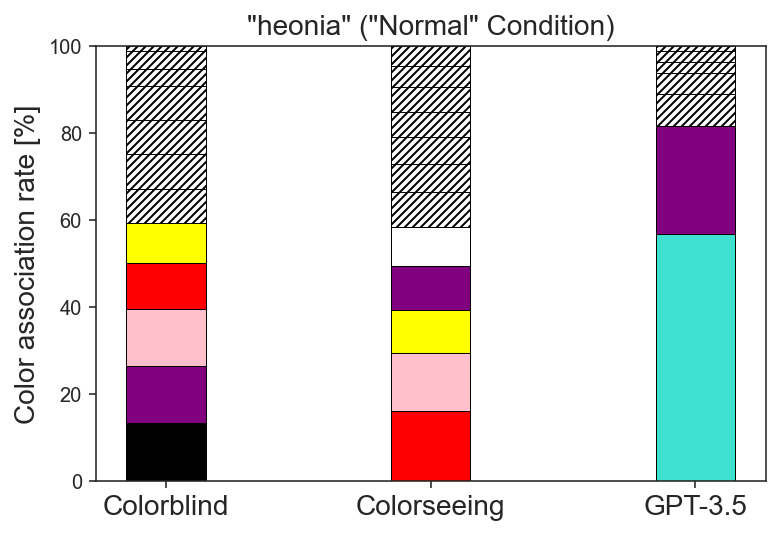

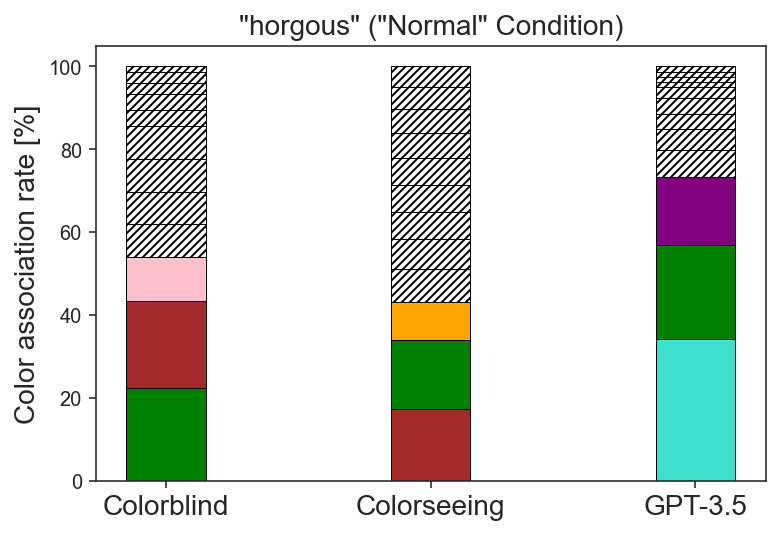

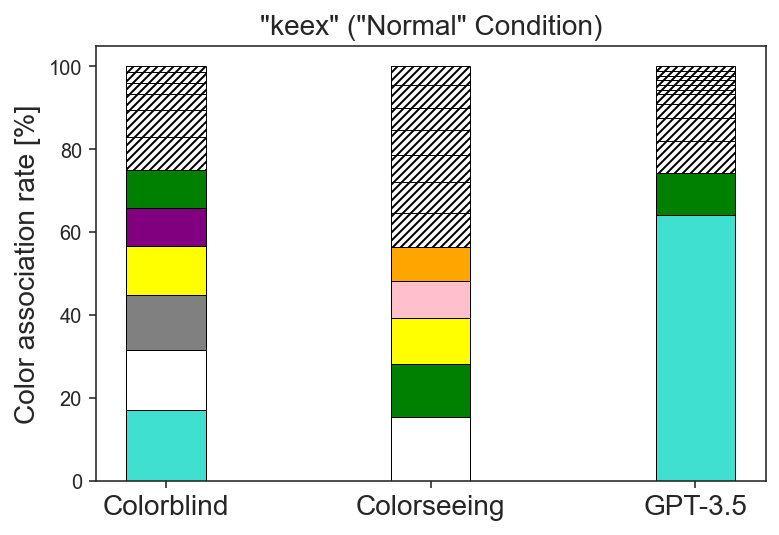

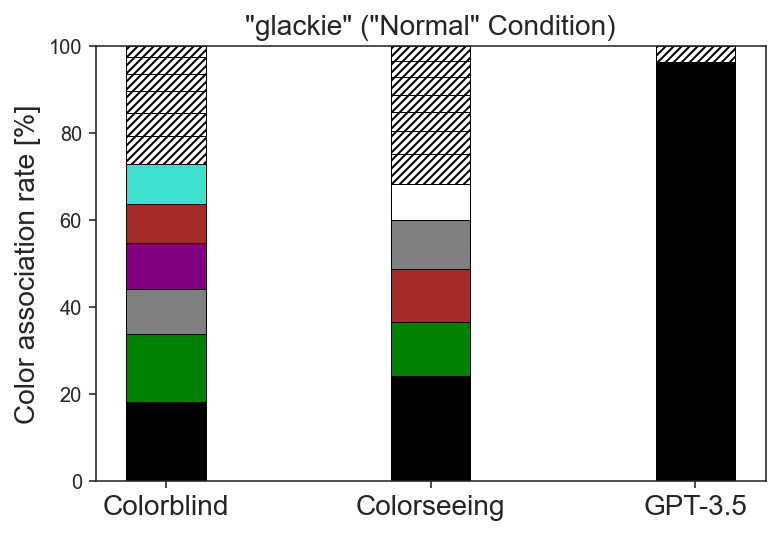

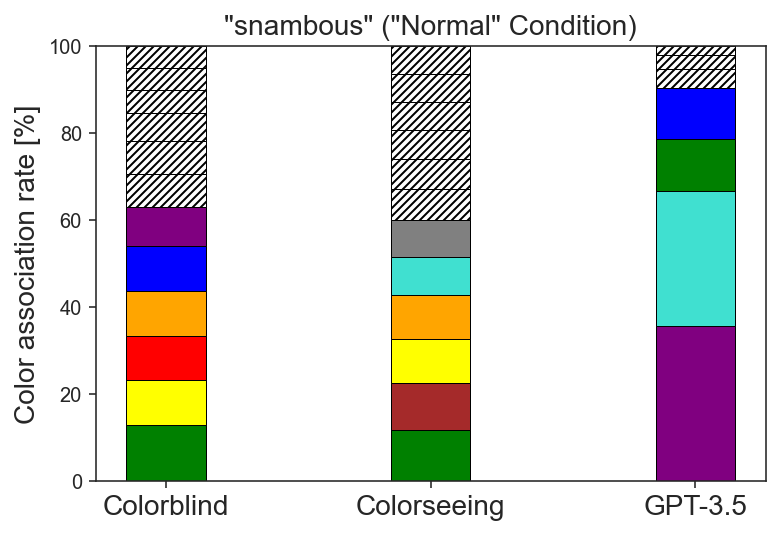

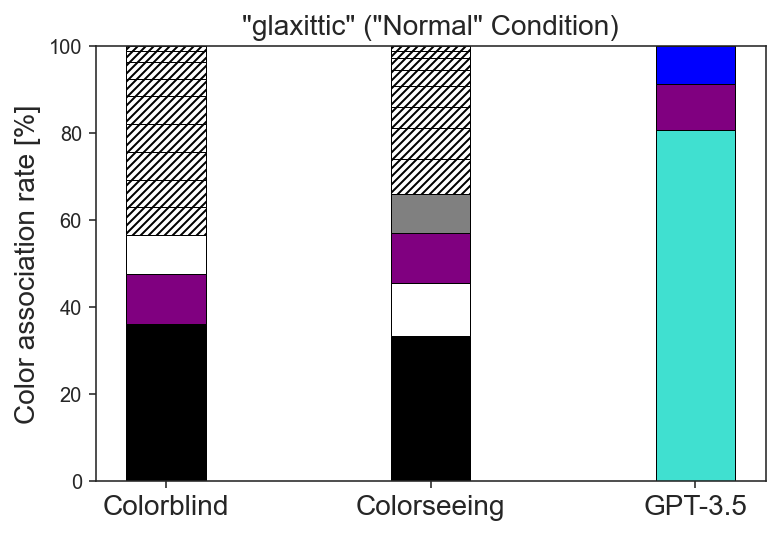

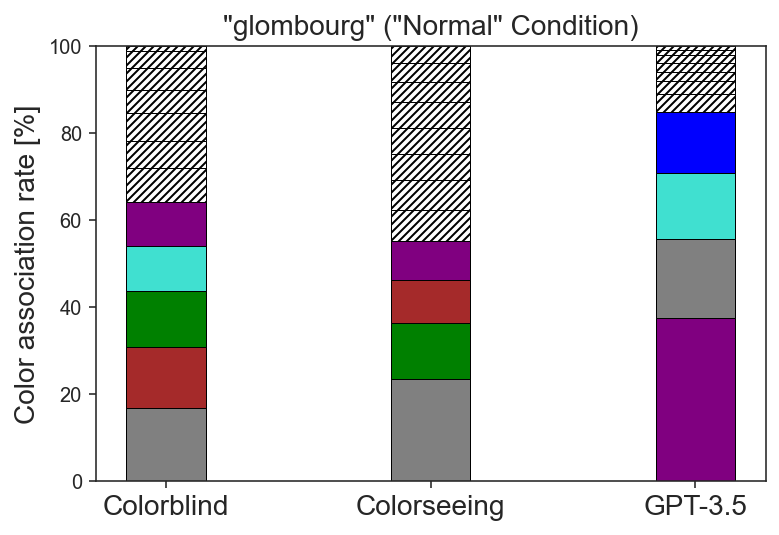

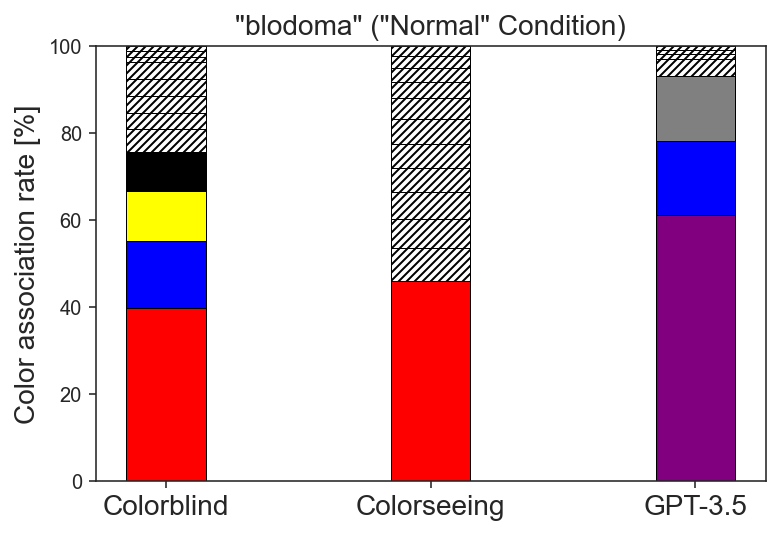

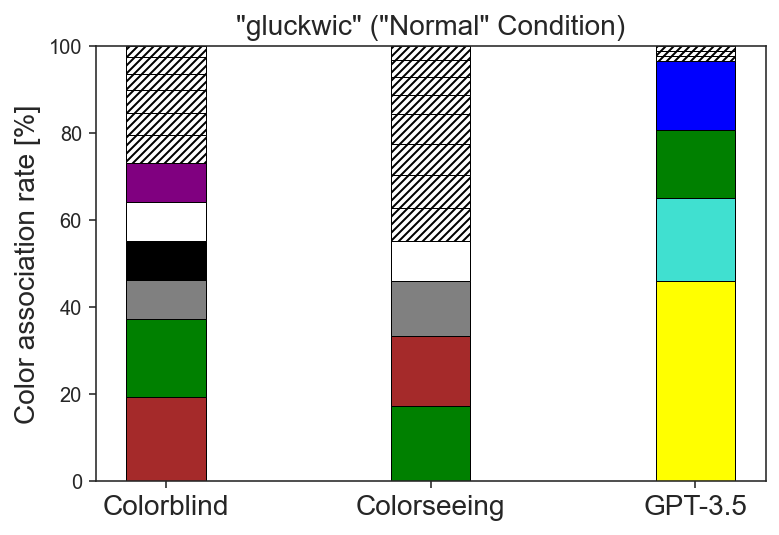

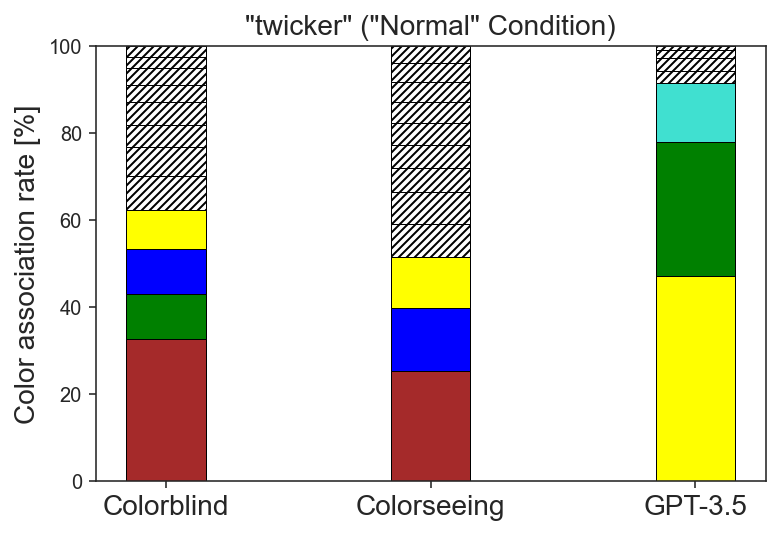

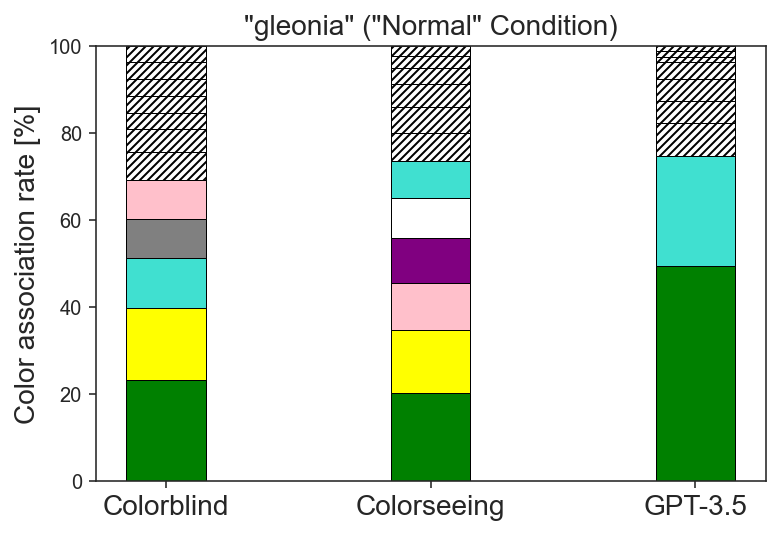

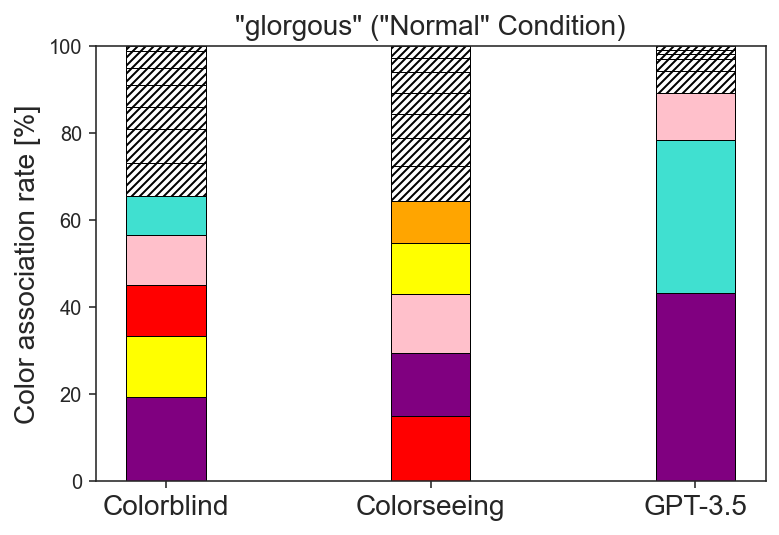

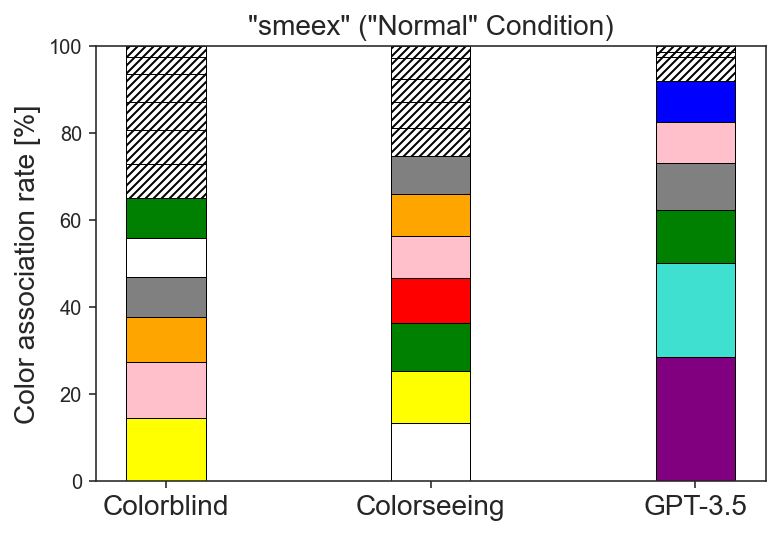

In [13]:
create_grouped_bar_plots(modal_colors, terms, all_colors,'pseudowords')

In [14]:
#Example: find terms for which GPT and colorseeing modal judgments match in negated condition 
match = 0.
total = 0.

for term in modal_colors['gpt']['_opp'].keys():
    if np.argmax(modal_colors['gpt']['_opp'][term]) == np.argmax(modal_colors['colorseeing']['_opp'][term]):
        match += 1
    total += 1
    
print(match,total)
proportions_ztest(match,total,value=0.5)

6.0 34.0


(-4.948544759633404, 7.477039736233832e-07)

### Coherence by Category

In [15]:
entropy_dict_norm = {}
entropy_dict_opp = {}

modal_dict_norm = {}
modal_dict_opp = {}

all_dict_norm = {}
all_dict_opp = {}

for category in ['extant', 'numbers', 'disciplines', 'emotion', 'digits','pseudowords','pseudowords_phonesthesia']:
    entropy_dict_norm[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    entropy_dict_opp[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    modal_dict_norm[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    modal_dict_opp[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    all_dict_norm[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    all_dict_opp[category] = {'colorblind': [], 'colorseeing': [], 'gpt': [], 'gpt2': []}
    if category in ['pseudowords','pseudowords_phonesthesia']:
        for term in terms[category]:
            for group in ['colorblind','colorseeing','gpt','gpt2']:
                entropy_dict_norm[category][group].append(scipy.stats.entropy(modal_colors[group]['pseudowords'][term]))
                entropy_dict_opp[category][group].append(scipy.stats.entropy(modal_colors[group]['pseudowords'][term]))
                modal_dict_norm[category][group].append(np.max(modal_colors[group]['pseudowords'][term]))
                modal_dict_opp[category][group].append(np.max(modal_colors[group]['pseudowords'][term]))
                all_dict_norm[category][group].append(np.sort(modal_colors[group]['pseudowords'][term])[::-1])
                all_dict_opp[category][group].append(np.sort(modal_colors[group]['pseudowords'][term])[::-1])        
    else:
        for term in terms[category]:
            for group in ['colorblind','colorseeing','gpt','gpt2']:
                entropy_dict_norm[category][group].append(scipy.stats.entropy(modal_colors[group]['_norm'][term]))
                entropy_dict_opp[category][group].append(scipy.stats.entropy(modal_colors[group]['_opp'][term]))
                modal_dict_norm[category][group].append(np.max(modal_colors[group]['_norm'][term]))
                modal_dict_opp[category][group].append(np.max(modal_colors[group]['_opp'][term]))
                all_dict_norm[category][group].append(np.sort(modal_colors[group]['_norm'][term])[::-1])
                all_dict_opp[category][group].append(np.sort(modal_colors[group]['_opp'][term])[::-1])

### Extant terms

In [21]:
total_within_group = {}
modal_within_group = {}

total_within_group_per_category = {}
modal_within_group_per_category = {}

for condition in ['_norm','_opp']:
    total_within_group[condition] = {}
    total_within_group_per_category[condition] = {}
    modal_within_group[condition] = {}
    modal_within_group_per_category[condition] = {}
    for group in ['colorblind','colorseeing','gpt','gpt2']:
        total_within_group_per_category[condition][group] = {}
        modal_within_group_per_category[condition][group] = {}
        total = 0
        modal = 0
        for category in ['extant','numbers', 'disciplines', 'emotion', 'digits']:
            total_within_group_per_category[condition][group][category] = 0
            modal_within_group_per_category[condition][group][category] = 0
            for term in terms[category]:
                total += total_colors_count[group][condition][term]
                total_within_group_per_category[condition][group][category] += total_colors_count[group][condition][term]
                modal += modal_colors_count[group][condition][term]
                modal_within_group_per_category[condition][group][category] += modal_colors_count[group][condition][term]

        total_within_group[condition][group] = total
        modal_within_group[condition][group] = modal

In [22]:
#Example: z-test of all colorblind vs. colorseeing judgments in normal condition
print(proportions_ztest([modal_within_group['_norm']['colorblind'],
                                modal_within_group['_norm']['colorseeing']], 
                               [total_within_group['_norm']['colorblind'],
                                total_within_group['_norm']['colorseeing']]))

(1.5629021595959816, 0.11807560963952538)


colorblind extant 1.0
colorseeing extant 0.9819684158195419
gpt extant 0.9952380952380953
colorblind numbers 0.26043906810035844
colorseeing numbers 0.2251745231739691
gpt numbers 0.3028571428571428
colorblind disciplines 0.25319351186358857
colorseeing disciplines 0.23218228502317356
gpt disciplines 0.6857142857142857
colorblind emotion 0.5445551443412897
colorseeing emotion 0.5001330906218124
gpt emotion 0.9333333333333332
colorblind digits 0.20481543735854082
colorseeing digits 0.20720764445995052
gpt digits 0.3314285714285714


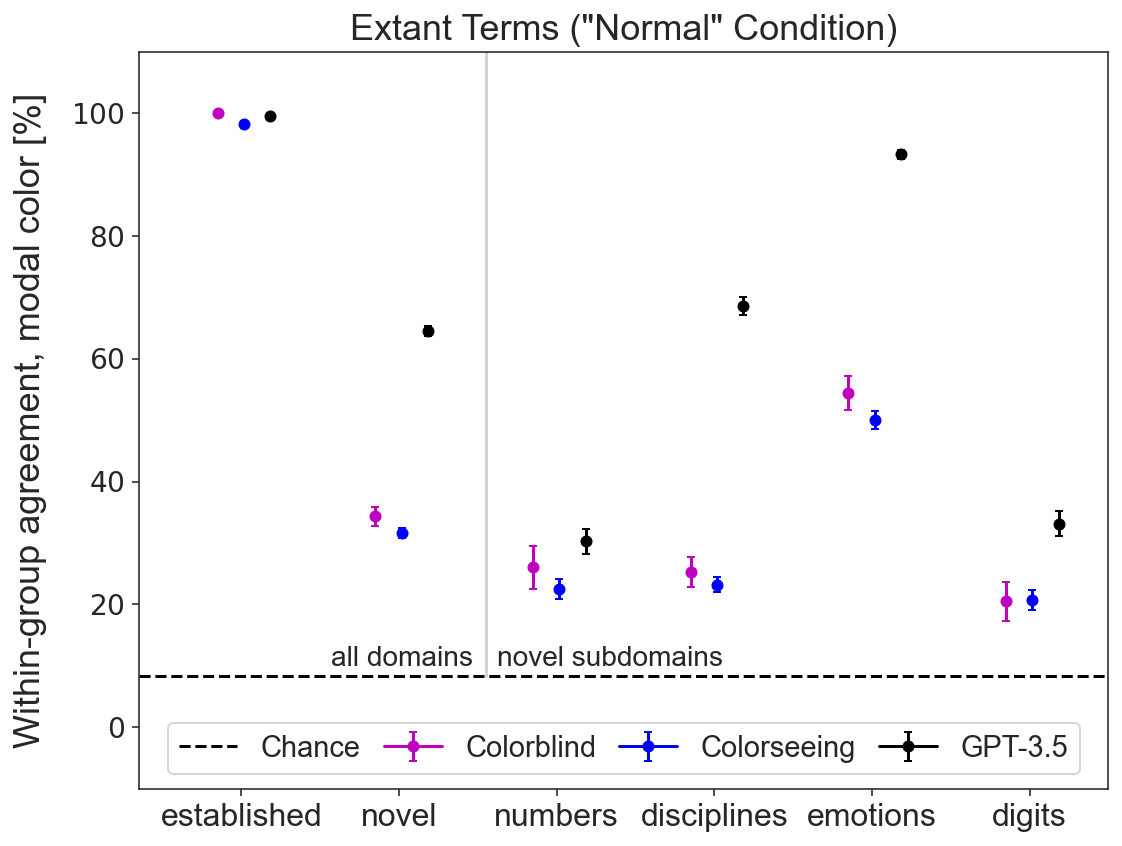

In [23]:
plt.figure(figsize=(8,6))

plot_colors = {'colorblind': 'm', 'colorseeing': 'b', 'gpt': 'k'}
plot_labels = {'colorblind': 'Colorblind', 'colorseeing': 'Colorseeing', 'gpt': 'GPT-3.5'}

non_extant_fractions = {'colorblind': [], 'colorseeing': [], 'gpt': []}
non_extant_total = {'colorblind': 0, 'colorseeing': 0, 'gpt': 0}

for i,category in enumerate(['extant', 'numbers', 'disciplines', 'emotion', 'digits']):
    indices = i
    k = i
    if i > 0:
        k = i+1
    for j,group in enumerate(['colorblind','colorseeing','gpt']):
        fractions = np.array(all_dict_norm[category][group])
        if i > 0:
            non_extant_fractions[group].extend(fractions[:,0])
            non_extant_total[group] += total_within_group_per_category['_norm'][group][category]
        print(group,category,np.mean(fractions,axis=0)[0])
        plt.errorbar(k+j/6.,np.mean(fractions,axis=0)[0],
                     yerr=1.*np.sqrt(np.mean(fractions,axis=0)[0]*(1.-np.mean(fractions,axis=0)[0])/total_within_group_per_category['_norm'][group][category]),
                     c=plot_colors[group],
                    marker='o',markersize=5,capsize=2)

for j,group in enumerate(['colorblind','colorseeing','gpt']):
    plt.errorbar(1+j/6.,np.mean(non_extant_fractions[group]),
                 yerr=1.*np.sqrt(np.mean(non_extant_fractions[group])*(1.-np.mean(non_extant_fractions[group]))/non_extant_total[group]),#scipy.stats.sem(non_extant_fractions[group]),
                 c=plot_colors[group],label=plot_labels[group],
                    marker='o',markersize=5,capsize=2)
    
plt.plot(np.ones(10)*0.5*(1.2+2.2),np.linspace(1./12.,1.1,10),color='gray',ls='-',alpha=0.35)
plt.text(0.72,0.1,'all domains',fontsize=14)
plt.text(1.77,0.1,'novel subdomains',fontsize=14)
plt.plot(np.linspace(-0.5,6,10),np.ones(10)*(1./12.),'k--',label='Chance')
plt.legend(loc='lower center',fontsize=14.5,columnspacing=0.8,ncol=4)#,bbox_to_anchor=(1.5,1.0))
plt.xticks([0.15,1.15,2.15,3.15,4.15,5.15],['established', 'novel', 'numbers', 'disciplines', 'emotions', 'digits'],fontsize=16)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['$0$','$20$','$40$','$60$','$80$','$100$'],fontsize=14)
plt.ylabel(r'Within-group agreement, modal color [%]',fontsize=18,labelpad=12)
plt.xlim(-0.5,5.65)
plt.ylim(-0.1,1.1)
plt.title('Extant Terms ("Normal" Condition)',fontsize=18)
plt.tight_layout()
plt.show()

colorblind extant 0.2948463169051404
colorseeing extant 0.29029671372667404
gpt extant 0.611904761904762
colorblind numbers 0.1830004990501948
colorseeing numbers 0.15912863031507102
gpt numbers 0.32761904761904764
colorblind disciplines 0.1972182132611623
colorseeing disciplines 0.16711693129304067
gpt disciplines 0.4885714285714286
colorblind emotion 0.3291609120785571
colorseeing emotion 0.31894680157022154
gpt emotion 0.6152380952380953
colorblind digits 0.17250457875457875
colorseeing digits 0.16358719840164518
gpt digits 0.30095238095238097


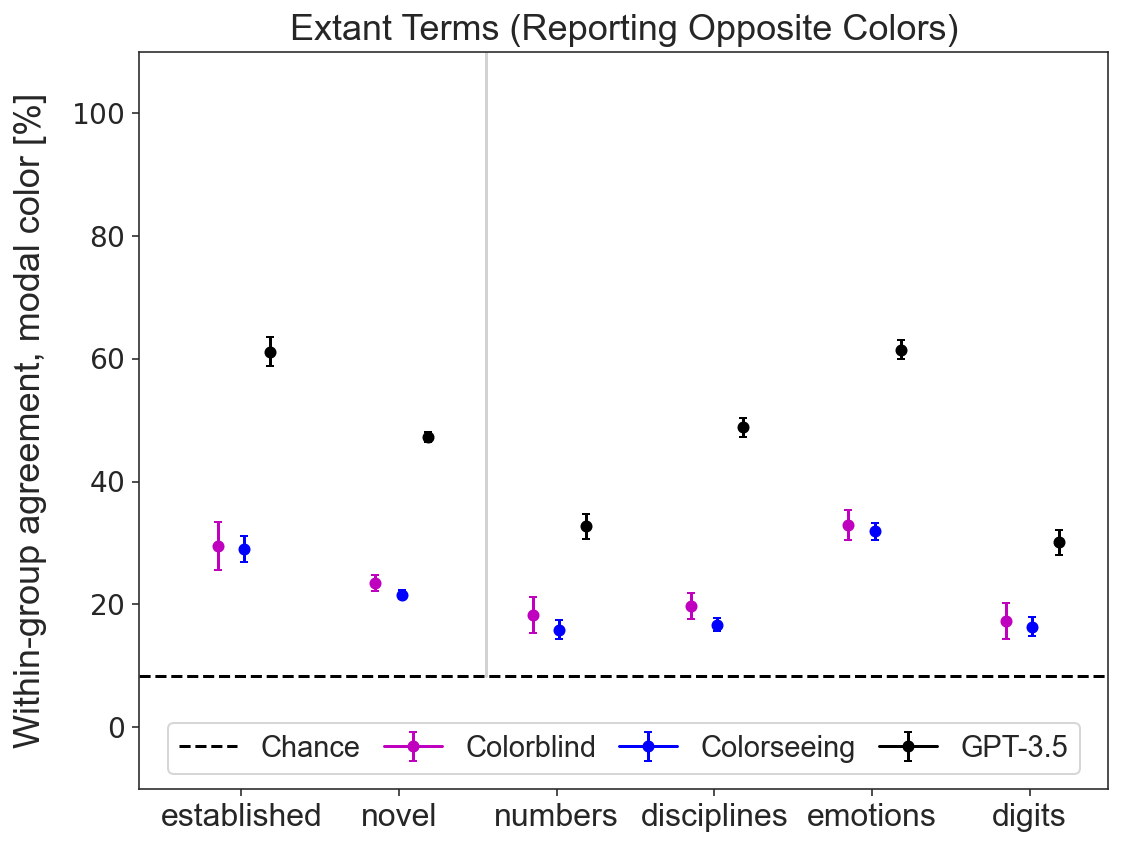

In [24]:
plt.figure(figsize=(8,6))

plot_colors = {'colorblind': 'm', 'colorseeing': 'b', 'gpt': 'k'}
plot_labels = {'colorblind': 'Colorblind', 'colorseeing': 'Colorseeing', 'gpt': 'GPT-3.5'}

non_extant_fractions = {'colorblind': [], 'colorseeing': [], 'gpt': []}
non_extant_total = {'colorblind': 0, 'colorseeing': 0, 'gpt': 0}

for i,category in enumerate(['extant', 'numbers', 'disciplines', 'emotion', 'digits']):
    indices = i
    k = i
    if i > 0:
        k = i+1
    for j,group in enumerate(['colorblind','colorseeing','gpt']):
        fractions = np.array(all_dict_opp[category][group])
        if i > 0:
            non_extant_fractions[group].extend(fractions[:,0])
            non_extant_total[group] += total_within_group_per_category['_opp'][group][category]
        print(group,category,np.mean(fractions,axis=0)[0])
        plt.errorbar(k+j/6.,np.mean(fractions,axis=0)[0],
                     yerr=1.*np.sqrt(np.mean(fractions,axis=0)[0]*(1.-np.mean(fractions,axis=0)[0])/total_within_group_per_category['_opp'][group][category]),#yerr=scipy.stats.sem(fractions[:,0]),
                     c=plot_colors[group],
                    marker='o',markersize=5,capsize=2)

for j,group in enumerate(['colorblind','colorseeing','gpt']):
    plt.errorbar(1+j/6.,np.mean(non_extant_fractions[group]),
                 yerr=1.*np.sqrt(np.mean(non_extant_fractions[group])*(1.-np.mean(non_extant_fractions[group]))/non_extant_total[group]),#scipy.stats.sem(non_extant_fractions[group]),
                 c=plot_colors[group],label=plot_labels[group],
                    marker='o',markersize=5,capsize=2)
    
plt.plot(np.ones(10)*0.5*(1.2+2.2),np.linspace(1./12.,1.1,10),color='gray',ls='-',alpha=0.35)
plt.plot(np.linspace(-0.5,6,10),np.ones(10)*(1./12.),'k--',label='Chance')
plt.legend(loc='lower center',fontsize=14.5,columnspacing=0.8,ncol=4)
plt.xticks([0.15,1.15,2.15,3.15,4.15,5.15],['established', 'novel', 'numbers', 'disciplines', 'emotions', 'digits'],fontsize=16)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['$0$','$20$','$40$','$60$','$80$','$100$'],fontsize=14)
plt.ylabel(r'Within-group agreement, modal color [%]',fontsize=18,labelpad=12)
plt.xlim(-0.5,5.65)
plt.ylim(-0.1,1.1)
plt.title('Extant Terms (Reporting Opposite Colors)',fontsize=18)
plt.tight_layout()
plt.show()

In [25]:
#Pseudowords
total_within_group = {}
modal_within_group = {}
total_within_group_per_category = {}
modal_within_group_per_category = {}

for condition in ['pseudowords']:
    total_within_group[condition] = {}
    total_within_group_per_category[condition] = {}
    modal_within_group[condition] = {}
    modal_within_group_per_category[condition] = {}
    for group in ['colorblind','colorseeing','gpt','gpt2']:
        total = 0
        modal = 0
        total_within_group_per_category[condition][group] = {}
        modal_within_group_per_category[condition][group] = {}
        for category in ['pseudowords','pseudowords_phonesthesia']:
            total_within_group_per_category[condition][group][category] = 0
            modal_within_group_per_category[condition][group][category] = 0
            for term in terms[category]:
                total += total_colors_count[group][condition][term]
                total_within_group_per_category[condition][group][category] += total_colors_count[group][condition][term]
                modal += modal_colors_count[group][condition][term]
                modal_within_group_per_category[condition][group][category] += modal_colors_count[group][condition][term]
        total_within_group[condition][group] = total
        modal_within_group[condition][group] = modal

In [26]:
#Example: z-test of all colorblind vs. colorseeing judgments in normal condition for pseudowords
print(proportions_ztest([modal_within_group['pseudowords']['colorblind'],
                                modal_within_group['pseudowords']['colorseeing']], 
                               [total_within_group['pseudowords']['colorblind'],
                                total_within_group['pseudowords']['colorseeing']]))

(0.5691676609738757, 0.5692423647663614)


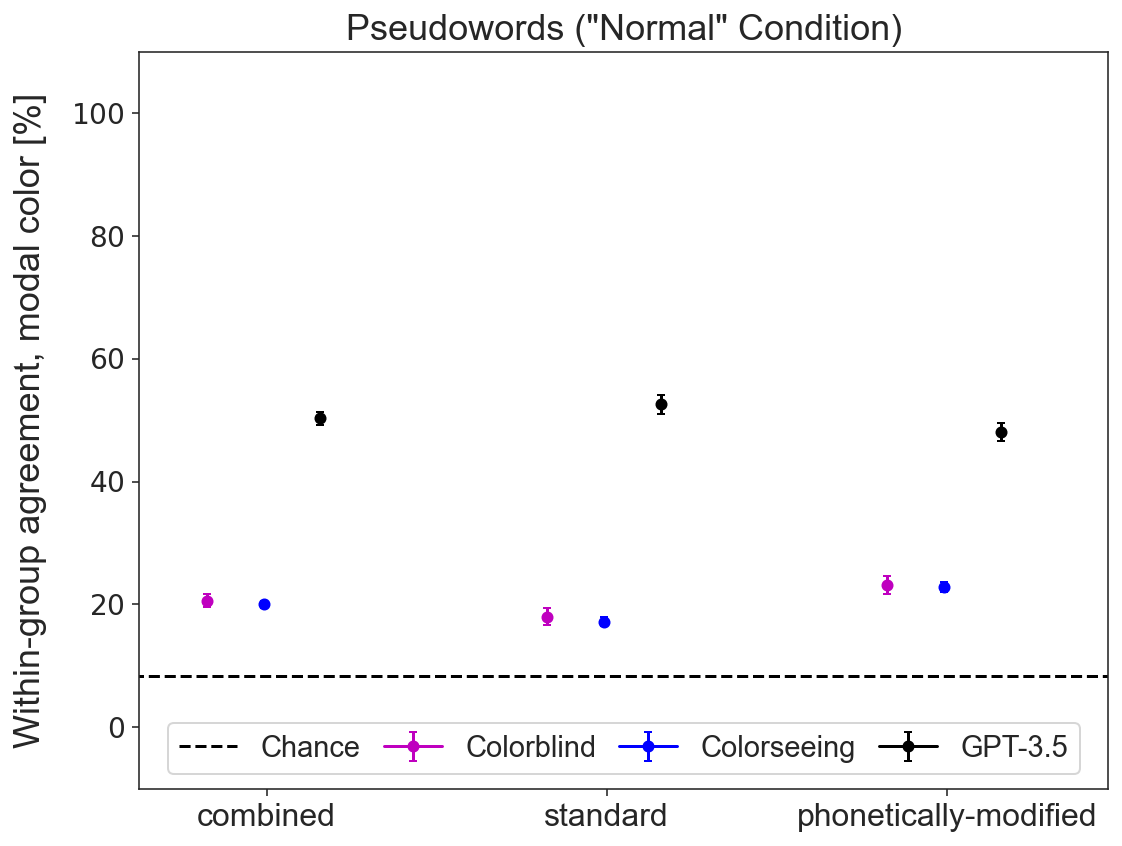

In [27]:
plt.figure(figsize=(8,6))

plot_colors = {'colorblind': 'm', 'colorseeing': 'b', 'gpt': 'k'}
plot_labels = {'colorblind': 'Colorblind', 'colorseeing': 'Colorseeing', 'gpt': 'GPT-3.5'}

non_extant_fractions = {'colorblind': [], 'colorseeing': [], 'gpt': []}
total_fractions ={'colorblind': 0, 'colorseeing': 0, 'gpt': 0}
for i,category in enumerate(['pseudowords','pseudowords_phonesthesia']):
    indices = i
    k = i
    if i > -1:
        k = i+1
    for j,group in enumerate(['colorblind','colorseeing','gpt']):
        fractions = np.array(all_dict_norm[category][group])
        if i > -1:
            non_extant_fractions[group].extend(fractions[:,0])
            total_fractions[group] += total_within_group_per_category['pseudowords'][group][category]
        plt.errorbar(k+j/6.,np.mean(fractions,axis=0)[0],
                     yerr=1.*np.sqrt(np.mean(fractions,axis=0)[0]*(1.-np.mean(fractions,axis=0)[0])/total_within_group_per_category['pseudowords'][group][category]),
                     c=plot_colors[group],
                    marker='o',markersize=5,capsize=2)

for j,group in enumerate(['colorblind','colorseeing','gpt']):
    plt.errorbar(0+j/6.,np.mean(non_extant_fractions[group]),
                 yerr=1.*np.sqrt(np.mean(non_extant_fractions[group])*(1.-np.mean(non_extant_fractions[group]))/total_fractions[group]),
                 c=plot_colors[group],label=plot_labels[group],
                    marker='o',markersize=5,capsize=2)
    
plt.plot(np.linspace(-0.5,6,10),np.ones(10)*(1./12.),'k--',label='Chance')
plt.legend(loc='lower center',fontsize=14.5,columnspacing=0.8,ncol=4)#,bbox_to_anchor=(1.5,1.0))
plt.xticks([0.175,1.175,2.175],['combined', 'standard', 'phonetically-modified'],fontsize=16)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['$0$','$20$','$40$','$60$','$80$','$100$'],fontsize=14)
plt.ylabel(r'Within-group agreement, modal color [%]',fontsize=18,labelpad=12)
plt.xlim(-0.2,2.65)
plt.ylim(-0.1,1.1)
plt.title('Pseudowords ("Normal" Condition)',fontsize=18)
plt.tight_layout()
plt.show()

### Color Association Statistics

In [28]:
pairwise_ks_stats = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
pairwise_ks_pvals = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

pairwise_stats = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
pairwise_pvals = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

discrete_stats = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
discrete_pvals = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

count_all_dict = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
nobs_all_dict = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

count_discrete_dict = {'_norm': {}, '_opp': {}, 'pseudowords': {}}
nobs_discrete_dict = {'_norm': {}, '_opp': {}, 'pseudowords': {}}

for condition in ['_norm','_opp','pseudowords']:
    for group1 in ['colorblind','colorseeing','gpt']:
        count_all_dict[condition][group1] = {}
        nobs_all_dict[condition][group1] = {}
        ###
        for group2 in ['colorseeing','gpt']:
            if group1 == group2:
                continue
            elif group1 == 'gpt':
                continue
            else:
                count_all_dict[condition][group2] = {}
                nobs_all_dict[condition][group2] = {}
                ###
                pairwise_ks_stats[condition][group1+'_'+group2] = {}
                pairwise_ks_pvals[condition][group1+'_'+group2] = {}
                ###
                pairwise_stats[condition][group1+'_'+group2] = {}
                pairwise_pvals[condition][group1+'_'+group2] = {}
                ###
                discrete_stats[condition][group1+'_'+group2] = {}
                discrete_pvals[condition][group1+'_'+group2] = {}
                ###
                count_discrete_dict[condition][group1+'_'+group2] = {}
                nobs_discrete_dict[condition][group1+'_'+group2] = {}
                ###
                if condition in ['_norm','_opp']:
                    category_list = ['extant', 'numbers', 'disciplines', 'emotion', 'digits']
                else:
                    category_list = ['pseudowords', 'pseudowords_phonesthesia']
                for category in category_list:
                    pairwise_ks_stats[condition][group1+'_'+group2][category] = {}
                    pairwise_ks_pvals[condition][group1+'_'+group2][category] = {}
                    ###
                    pairwise_stats[condition][group1+'_'+group2][category] = {}
                    pairwise_pvals[condition][group1+'_'+group2][category] = {}
                    ###
                    discrete_stats[condition][group1+'_'+group2][category] = {}
                    discrete_pvals[condition][group1+'_'+group2][category] = {}
                    ###
                    count_all = np.array([0,0])
                    nobs_all = np.array([0,0])
                    ###
                    count_discrete = 0
                    nobs_discrete = 0
                    for term in terms[category]:
                        count = np.array([modal_colors_count[group1][condition][term],
                                         modal_colors_count[group2][condition][term]])
                        nobs = np.array([total_colors_count[group1][condition][term],
                                         total_colors_count[group2][condition][term]])
                        ###
                        count_all += count
                        nobs_all += nobs
                        ###
                        if count[0]/nobs[0] > count[1]/nobs[1]:
                            count_discrete += 1
                        nobs_discrete += 1
                        ###
                        stat, pval = scipy.stats.ks_2samp(colors[group1][condition][term],
                                                         colors[group2][condition][term])
                        pairwise_ks_stats[condition][group1+'_'+group2][category][term] = stat
                        pairwise_ks_pvals[condition][group1+'_'+group2][category][term] = pval
                        ###
                        stat, pval = proportions_ztest(count, nobs)
                        pairwise_stats[condition][group1+'_'+group2][category][term] = stat
                        pairwise_pvals[condition][group1+'_'+group2][category][term] = pval
                        ###
                    ###
                    stat, pval = proportions_ztest(count_discrete, nobs_discrete, value=0.5)
                    discrete_stats[condition][group1+'_'+group2][category] = stat
                    discrete_pvals[condition][group1+'_'+group2][category] = pval
                    ###
                    count_discrete_dict[condition][group1+'_'+group2][category] = count_discrete
                    nobs_discrete_dict[condition][group1+'_'+group2][category] = nobs_discrete
                    ###
                    count_all_dict[condition][group1][category] = count_all[0]
                    count_all_dict[condition][group2][category] = count_all[1]
                    ###
                    nobs_all_dict[condition][group1][category] = nobs_all[0]
                    nobs_all_dict[condition][group2][category] = nobs_all[1]
                    ###
                    stat, pval = proportions_ztest(count_all, nobs_all)
                    pairwise_stats[condition][group1+'_'+group2][category]['all'] = stat
                    pairwise_pvals[condition][group1+'_'+group2][category]['all'] = pval

/Users/eon/miniconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/Users/eon/miniconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [29]:
#Example: p-values of all pairwise z-test comparisons for colorblind vs. colorseeing modal agreement rates
pairwise_pvals['_opp']['colorblind_colorseeing']

{'extant': {'grass': 0.37725893544515376,
  'blood': 0.1665895511184059,
  'banana': 0.8675655459964619,
  'snow': 0.9721758123044799,
  'all': 0.9584003813569936},
 'numbers': {'one': 0.9637746926061588,
  'two': 0.9700630970068327,
  'three': 0.4266543805751951,
  'four': 0.8306369558181208,
  'five': 0.4390408792992154,
  'all': 0.43507105335660423},
 'disciplines': {'psychology': 0.3959284734399313,
  'chemistry': 0.6518360019400903,
  'physics': 0.5526199048373265,
  'math': 0.7774619856354804,
  'compsci': 0.7230720973491769,
  'sociology': 0.1701571854914785,
  'theology': 0.4545206283333052,
  'philosophy': 0.7485989230778463,
  'linguistics': 0.4576865676376095,
  'history': 0.5465257382195291,
  'all': 0.19922849839230505},
 'emotion': {'desire': 0.8702939023012775,
  'fear': 0.900435848766709,
  'shame': 0.20229246269798018,
  'sadness': 0.7445562661989344,
  'hate': 0.2551546892839526,
  'joy': 0.29207100276002806,
  'anger': 0.609047197531852,
  'happiness': 0.013636161629